# Platinum run 20220809
Check signatures on the platinum run from 20220809, with blood samples at 120X

## Prepare mutation tables

In [6]:
import pandas as pd
import json

samples_dict = json.load(open('/workspace/projects/sjd_pediatric_tumors/code/sample_ids.json','rb'))
pts = ['pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8','pt10','pt11']

## Select SNVs for signature extraction

In [8]:
df = pd.DataFrame()
for pt in pts:
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[pt][tumor]
        normal_id = samples_dict[pt]['normal']
        df1 = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'+pt+'/'+tumor_id+'_vs_'+normal_id+'/process_vep_output/'+tumor_id+'_vs_'+normal_id+'.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][df1['mut_type']=='snv']
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,8139423,G,T,AQ5180_vs_AQ5174
1,chr1,19841394,C,T,AQ5180_vs_AQ5174
2,chr1,22354916,C,A,AQ5180_vs_AQ5174
3,chr1,24571114,G,T,AQ5180_vs_AQ5174
4,chr1,33010722,C,A,AQ5180_vs_AQ5174
...,...,...,...,...,...
47688,chrX,142517955,G,C,AW8057_vs_AW8060
47689,chrX,142718466,T,C,AW8057_vs_AW8060
47690,chrX,144032771,C,T,AW8057_vs_AW8060
47691,chrX,146917099,C,G,AW8057_vs_AW8060


In [9]:
df[df['SAMPLE']=='AQ5187_vs_AQ5175']

,CHROM,POS,REF,ALT,SAMPLE
6022,chr1,1075147,C,T,AQ5187_vs_AQ5175
6023,chr1,2116794,T,A,AQ5187_vs_AQ5175
6024,chr1,2967184,G,A,AQ5187_vs_AQ5175
6025,chr1,5214785,A,T,AQ5187_vs_AQ5175
6026,chr1,5822379,G,A,AQ5187_vs_AQ5175
...,...,...,...,...,...
8429,chrX,151831537,C,T,AQ5187_vs_AQ5175
8430,chrX,152184507,C,A,AQ5187_vs_AQ5175
8431,chrX,152966515,G,T,AQ5187_vs_AQ5175
8432,chrX,155648836,T,A,AQ5187_vs_AQ5175


In [10]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,15251,15251,15251,15251
C,8749,8749,8749,8749
G,8505,8505,8505,8505
T,15188,15188,15188,15188


In [4]:
df.to_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809.tsv.gz',sep='\t',index=None,compression='gzip')

### Make json file with signatures to analyse with deconstructsigs per sample

In [11]:
sigs_dict = {}
for pt in pts:
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[pt][tumor]
        normal_id = samples_dict[pt]['normal']
        sample_id = tumor_id + '_vs_' + normal_id
        sigs_dict[sample_id] = ['SBS1','SBS5','SBS18','SBS31','SBS35']
sigs_dict

{'AQ5180_vs_AQ5174': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5186_vs_AQ5174': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5181_vs_AQ5175': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5187_vs_AQ5175': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5182_vs_AQ5176': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5188_vs_AQ5176': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5183_vs_AQ5177': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5189_vs_AQ5177': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5184_vs_AQ5178': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5190_vs_AQ5178': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5185_vs_AQ5179': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AQ5191_vs_AQ5179': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AW8048_vs_AW8058': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AW8049_vs_AW8058': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AW8050_vs_AW8061': ['SBS1', 'SBS5', 'SBS18', 'SBS31', 'SBS35'],
 'AW8051_v

In [35]:
with open("/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230217_allsamples_run20220809/sigs.json",'w') as out_file:
    json.dump(sigs_dict, out_file, indent=2)
out_file.close()

## Signature fitting with deconstructSigs

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
all_muts_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809.tsv.gz',sep='\t')
all_muts_df = all_muts_df[['SAMPLE','CHROM']].groupby('SAMPLE',as_index=False).count()
all_muts_df = all_muts_df.rename(columns={'SAMPLE':'sample_id','CHROM':'total_muts'})
all_muts_df

,sample_id,total_muts
0,AQ5180_vs_AQ5174,1392
1,AQ5181_vs_AQ5175,2922
2,AQ5182_vs_AQ5176,179
3,AQ5183_vs_AQ5177,669
4,AQ5184_vs_AQ5178,1126
5,AQ5185_vs_AQ5179,3101
6,AQ5186_vs_AQ5174,1708
7,AQ5187_vs_AQ5175,2412
8,AQ5188_vs_AQ5176,1128
9,AQ5189_vs_AQ5177,775


## Signature fitting (with SBS40)

In [14]:
samples_id = all_muts_df['sample_id'].tolist()

In [15]:
def color_sigs (sigs):

    colors_dict = {}
    colors_list = []
    greys = ['gainsboro','darkgrey','gray','lightgrey','lightgray','silver','dimgrey','dimgray','slategrey']
    i = 0
    for sig in sigs:
        if 'potential' in sig:
            color = greys[i]
            i+=1
        elif 'SBS1-' in sig or sig=='SBS1':
            color = 'orange'
        elif 'SBS2-' in sig or sig=='SBS2':
            color = 'olive'
        elif 'SBS3-' in sig or sig=='SBS3':
            color = 'mediumpurple'
        elif 'SBS5-' in sig or sig=='SBS5':
            color = 'skyblue'
        elif 'SBS7a' in sig:
            color = 'teal'
        elif 'SBS12' in sig:
            color = 'seagreen'
        elif 'SBS13' in sig:
            color = 'purple'
        elif 'SBS17b' in sig:
            color = 'pink'
        elif 'SBS18' in sig:
            color = 'royalblue'
        elif 'SBS31' in sig:
            color = 'firebrick'
        elif 'SBS32' in sig:
            color = 'plum'
        elif 'SBS35' in sig:
            color = 'lightcoral'
        elif 'SBS40' in sig:
            color = 'turquoise'
#         elif 'SBS45' in sig:
#             color = 'lightgrey'
        elif 'SBS60' in sig:
            color = 'darkseagreen'
        else:
            color = greys[i]
            i+=1
            pass
        colors_dict[sig] = color
        colors_list.append(color)
    return colors_dict,colors_list

In [16]:
def plot_stacked_bars(df,title,colors_list):
    df.plot(kind='bar', stacked=True, figsize=(8,4),color=colors_list)


    plt.legend(title='Signatures', bbox_to_anchor=(1.05, 1), loc='upper left')
    labels = ['pt1_t1','pt1_t2','pt2_t1','pt2_t2','pt3_t1','pt3_t2',
                        'pt4_t1','pt4_t2','pt5_t1','pt5_t2','pt6_t1','pt6_t2']
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels, rotation=0)
    plt.title(title,size=20,pad=20)
    xposition = [1.5, 3.5, 5.5,7.5,9.5]
    for xc in xposition:
        plt.axvline(x=xc, color='k', linestyle='--')
    plt.ylabel('Number of mutations')
    n=0.5
    for pt in pts:
        ttmt = samples[pt]['ttmt']
        plt.text(x=0+n,y=-450,s=ttmt)
        n = 2 + n
    plt.show()

def plot_stacked_bars_per_pt(df,title,colors_list,pt,loc):
    df.plot(kind='bar', stacked=True, figsize=(2,4),color=colors_list)


    plt.legend(title='Signatures', bbox_to_anchor=(1.05, 1), loc='upper left')
    labels = ['pt1_t1','pt1_t2','pt2_t1','pt2_t2','pt3_t1','pt3_t2',
                        'pt4_t1','pt4_t2','pt5_t1','pt5_t2','pt6_t1','pt6_t2']
    labels = [label for label in labels if pt in label]
    plt.xticks([0, 1], labels, rotation=0)
    plt.title(title,size=20,pad=20)
    plt.axvline(x=1.5, color='k', linestyle='--')
    plt.ylabel('Number of mutations')
    ttmt = samples[pt]['ttmt']
    plt.text(x=0+0.5,y=loc,s=ttmt)
    plt.show()

In [17]:
#All muts, with SBS40

order_list = samples_id

def df_fitting(samples_id,all_muts_df,path,sigs):
    df = pd.DataFrame()
    for sample in samples_id:
        try:
            df1 = pd.read_csv(path+sample+'_signatures_weight.csv',sep='\t')
        except:
            df1 = pd.DataFrame()
            df1['sample_id'] = sample
        df = pd.concat([df,df1],ignore_index=True)
        df = df.fillna(0)
    df['sample_id'] = df['sample_id'].astype("category")
    df['sample_id'].cat.set_categories(samples_id, inplace=True)
    df.drop_duplicates(inplace=True)
    df.drop(columns=['SSE'],inplace=True)
    df = df[['sample_id']+sigs+['unknown']]


    df = pd.merge(df,all_muts_df,how='outer')
    num_muts_df = pd.DataFrame()
    num_muts_df['sample_id'] = df['sample_id']
    for sig in sigs:
        num_muts_df[sig] = round(df[sig] * df['total_muts'],2)
    num_muts_df['Unknown'] = round(df['unknown'] * df['total_muts'],2)
    all_ttmt_sigs = ['SBS31','SBS32','SBS35']
    ttmt_sigs = [sig for sig in sigs if sig in all_ttmt_sigs]
    num_muts_df['ttmt'] = num_muts_df[ttmt_sigs].sum()
    num_muts_df['total_muts'] = df['total_muts']
    num_muts_df['ttmt_%'] = round((num_muts_df['ttmt']/num_muts_df['total_muts'])*100,2)
    num_muts_df = num_muts_df[['sample_id']+sigs+['Unknown']]
    num_muts_df = num_muts_df.set_index('sample_id')
    return num_muts_df


def plot_fitting (df,title,colors,labels,figsize,ylim,order_list):
    
    df = df.reindex(order_list)
    df.plot(kind='bar', stacked=True, figsize=figsize,color=colors)

    plt.legend(title='Signatures', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0,len(df)), labels, rotation=0)
    plt.title(title,size=20,pad=20)
    
    plt.ylabel('Number of mutations')
    plt.ylim(0,ylim)

    plt.xlabel(' ')
    
def plot_fitting_per_pt (df,title,loc,colors,ylim,legend,labels,figsize,pos1=0.05,pos2=-0.2,pvals=None):
    
    df.plot(kind='bar', stacked=True, figsize=figsize,color=colors,legend=legend)
    
    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')
        
    plt.xticks(range(0,len(df)), labels, rotation=0)
    plt.title(title,size=20,pad=20)
    plt.ylabel('Number of mutations')
    plt.ylim(0,ylim)

    plt.xlabel(' ')

#     ttmt = samples[pt]['ttmt']
#     plt.text(x=0.5,y=loc,s=ttmt)
    if pvals != None:
        n = -0.4
        for pval in pvals:
            if pval == 0:
                text = 'pval < 0.001'
            else:
                text = 'pval = '+str(pval)
                
            plt.text(x=n,y=ylim*1.02,s=text)
            n = n+1

In [19]:
samples_dict2 = {}
for pt in pts:
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[pt][tumor]
        normal_id = samples_dict[pt]['normal']
        sample_id = tumor_id + '_vs_'+normal_id
        samples_dict2[sample_id] = pt + '_t' + tumor[-1]
samples_dict2

{'AQ5180_vs_AQ5174': 'pt1_t1',
 'AQ5186_vs_AQ5174': 'pt1_t2',
 'AQ5181_vs_AQ5175': 'pt2_t1',
 'AQ5187_vs_AQ5175': 'pt2_t2',
 'AQ5182_vs_AQ5176': 'pt3_t1',
 'AQ5188_vs_AQ5176': 'pt3_t2',
 'AQ5183_vs_AQ5177': 'pt4_t1',
 'AQ5189_vs_AQ5177': 'pt4_t2',
 'AQ5184_vs_AQ5178': 'pt5_t1',
 'AQ5190_vs_AQ5178': 'pt5_t2',
 'AQ5185_vs_AQ5179': 'pt6_t1',
 'AQ5191_vs_AQ5179': 'pt6_t2',
 'AW8048_vs_AW8058': 'pt7_t1',
 'AW8049_vs_AW8058': 'pt7_t2',
 'AW8050_vs_AW8061': 'pt8_t1',
 'AW8051_vs_AW8061': 'pt8_t2',
 'AW8054_vs_AW8059': 'pt10_t1',
 'AW8055_vs_AW8059': 'pt10_t2',
 'AW8056_vs_AW8060': 'pt11_t1',
 'AW8057_vs_AW8060': 'pt11_t2'}

In [20]:
order_list = samples_dict2.keys()
order_list

dict_keys(['AQ5180_vs_AQ5174', 'AQ5186_vs_AQ5174', 'AQ5181_vs_AQ5175', 'AQ5187_vs_AQ5175', 'AQ5182_vs_AQ5176', 'AQ5188_vs_AQ5176', 'AQ5183_vs_AQ5177', 'AQ5189_vs_AQ5177', 'AQ5184_vs_AQ5178', 'AQ5190_vs_AQ5178', 'AQ5185_vs_AQ5179', 'AQ5191_vs_AQ5179', 'AW8048_vs_AW8058', 'AW8049_vs_AW8058', 'AW8050_vs_AW8061', 'AW8051_vs_AW8061', 'AW8054_vs_AW8059', 'AW8055_vs_AW8059', 'AW8056_vs_AW8060', 'AW8057_vs_AW8060'])

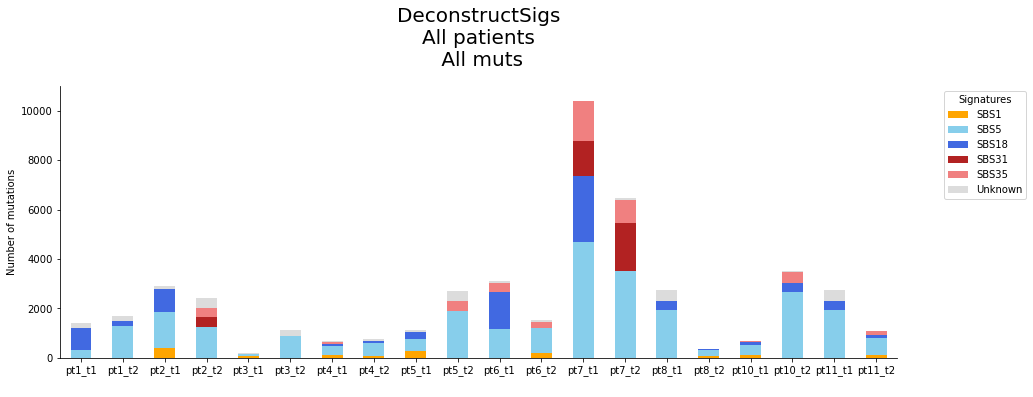

In [473]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230217_allsamples_run20220809/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = samples_dict2.keys()
labels = [samples_dict2[sample] for sample in samples_ids]
order_list = samples_dict2.keys()
plot_fitting(df,'DeconstructSigs\nAll patients\n All muts',colors_list,labels,figsize=(15,5),ylim=11000,order_list=order_list)

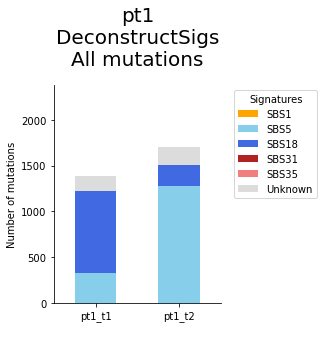

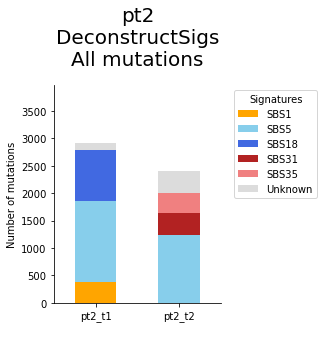

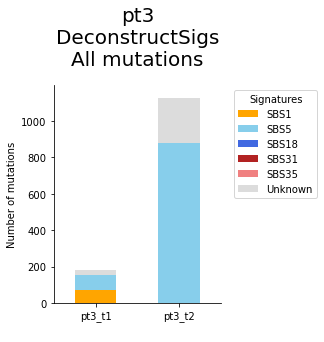

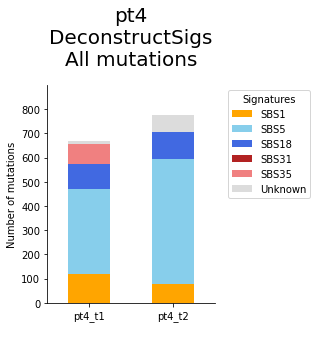

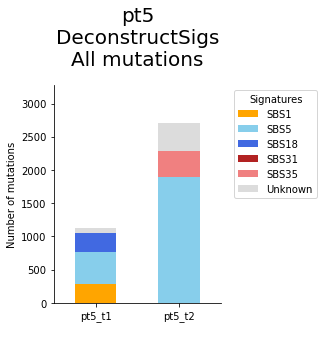

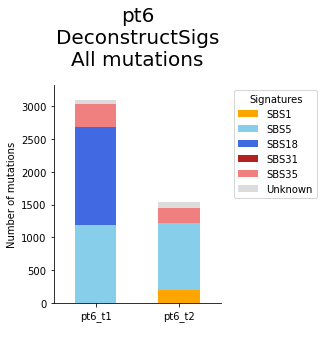

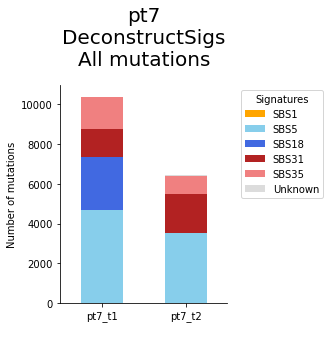

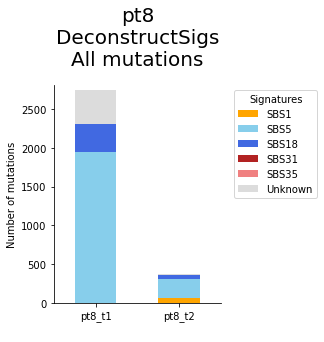

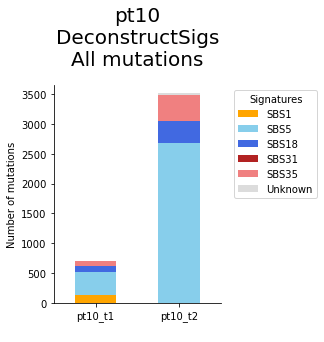

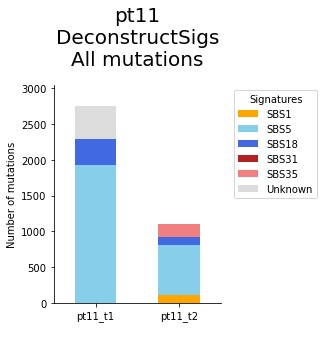

In [474]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230217_allsamples_run20220809/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]
    sigs = df1.columns.tolist()
    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    order_list = samples_dict2.keys()
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    plot_fitting(df1,pt+'\nDeconstructSigs\nAll mutations',colors_list,labels,figsize=(3,4),ylim=df1.max().sum(),order_list=samples_ids)

### mSigAct

In [475]:
#Prepare lists with pvalues
order_list = samples_dict2.keys()
path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_SBS40/output_sbs31/results.all_samples_run_20220809.matrix.tsv.mSigAct.SBS31.tsv'
df = pd.read_csv(path_sbs31,sep='\t')
df = df.reindex(order_list)
SBS31_all_pvals = df['pval'].tolist()
SBS31_all_pvals = [round(pval,3) for pval in SBS31_all_pvals]
path_sbs35 = path_sbs31.replace('31','35')
df = pd.read_csv(path_sbs35,sep='\t')
df = df.reindex(order_list)
SBS35_all_pvals = df['pval'].tolist()
SBS35_all_pvals = [round(pval,3) for pval in SBS35_all_pvals]

In [476]:
#prepare df with each mSigAct
df = pd.read_csv(path_sbs31,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
SBS31_df = df.reindex(order_list)
df = pd.read_csv(path_sbs35,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
SBS35_df = df.reindex(order_list)

### mSigAct SBS31

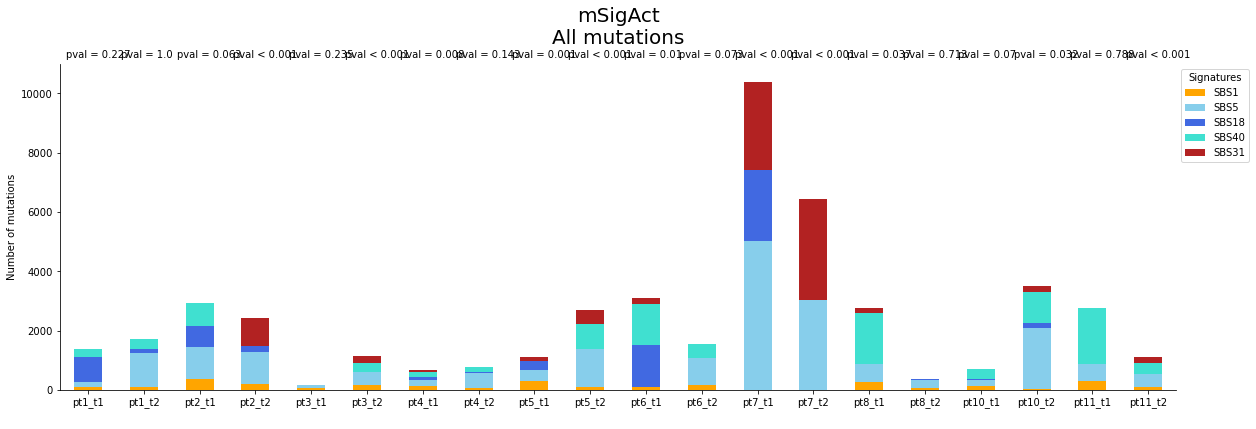

In [477]:
df = SBS31_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals
plot_fitting_per_pt(df,'mSigAct\nAll mutations',-350,colors_list,11000,True,labels,(20,6),1,1,pvals)

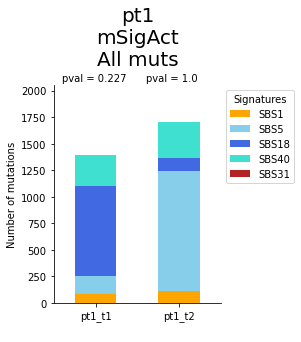

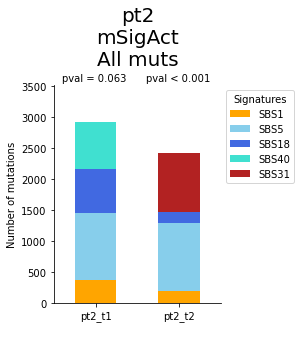

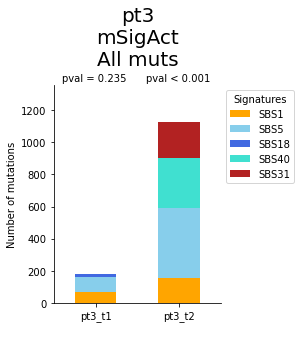

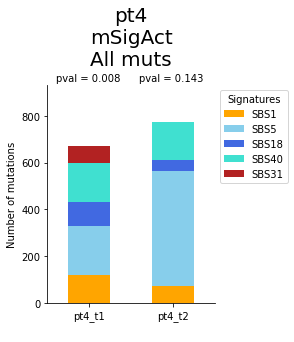

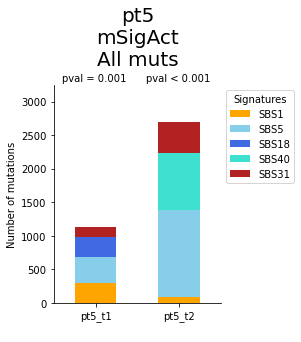

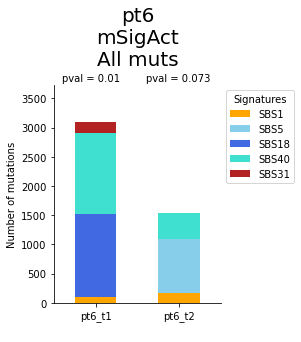

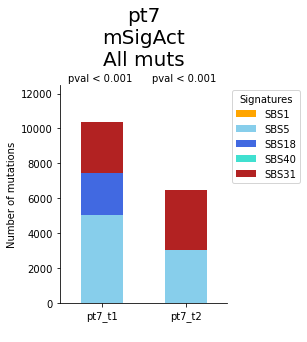

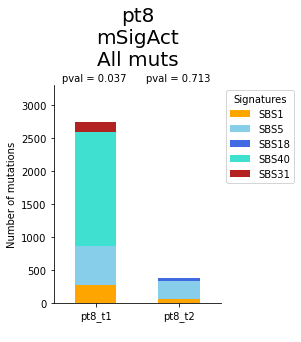

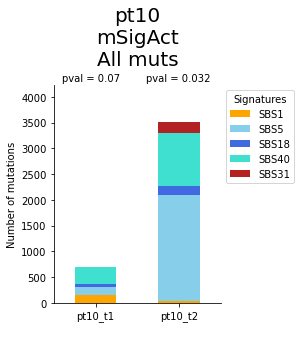

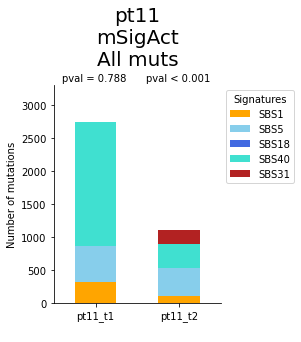

In [478]:
n=0
df = SBS31_df
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS31_all_pvals[n:n+2]
    ylim = df1.sum(axis=1).max()*1.2
#     ylim = 2000
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nAll muts',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)
    n=n+2

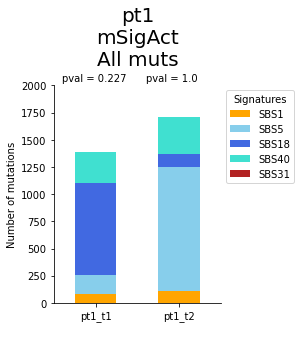

In [479]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[0:2]
# ylim = df1.sum(axis=1).max()*1.2
ylim = 2000
plot_fitting_per_pt(df1,pt+'\nmSigAct\nAll muts',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

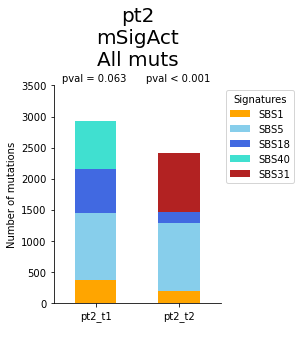

In [480]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[2:4]
# ylim = df1.sum(axis=1).max()*1.2
ylim = 3500
plot_fitting_per_pt(df1,pt+'\nmSigAct\nAll muts',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

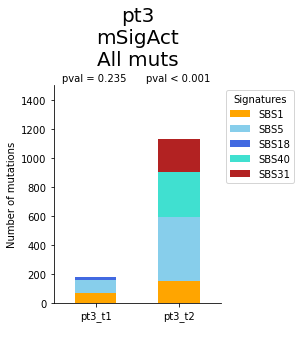

In [481]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[4:6]
# ylim = df1.sum(axis=1).max()*1.2
ylim = 1500
plot_fitting_per_pt(df1,pt+'\nmSigAct\nAll muts',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

### mSigAct SBS35

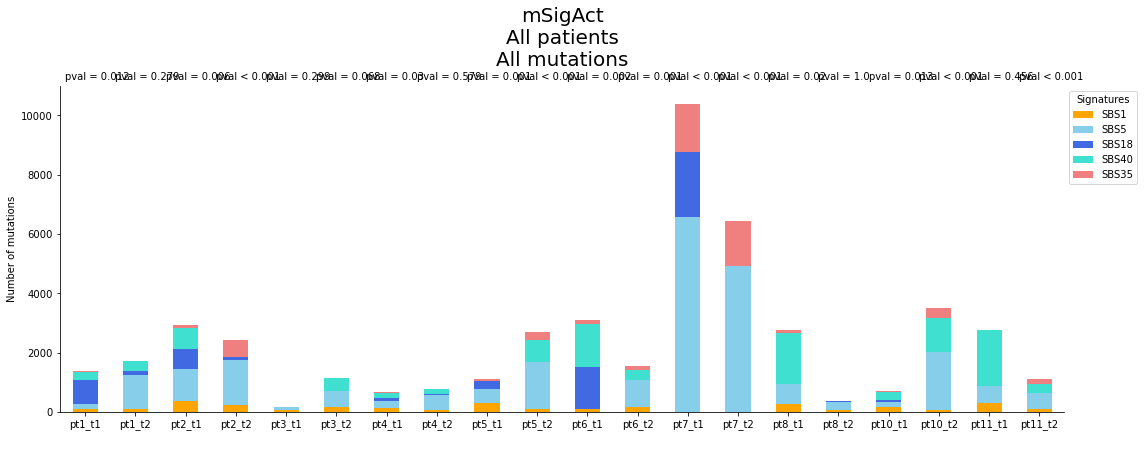

In [482]:
df = SBS35_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS35_all_pvals
plot_fitting_per_pt(df,'mSigAct\nAll patients\nAll mutations',-350,colors_list,11000,True,labels,(18,6),1,1,pvals)

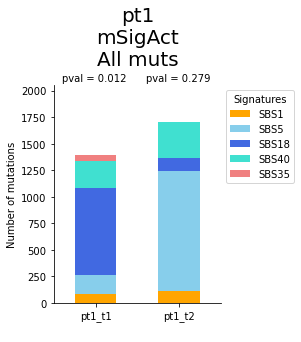

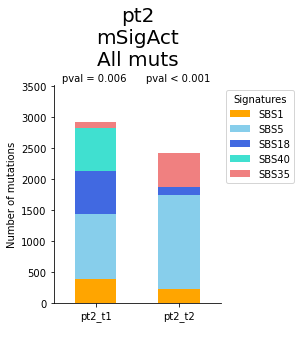

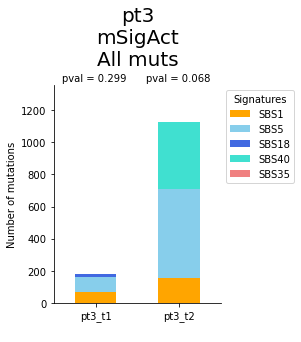

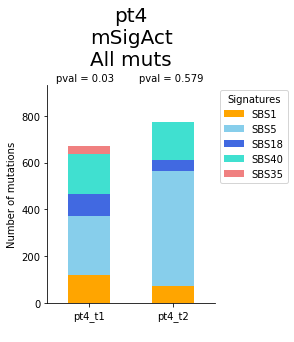

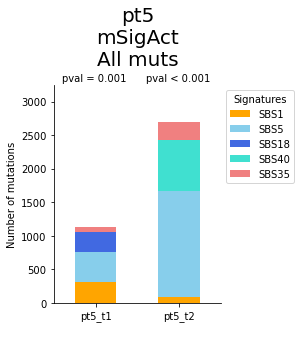

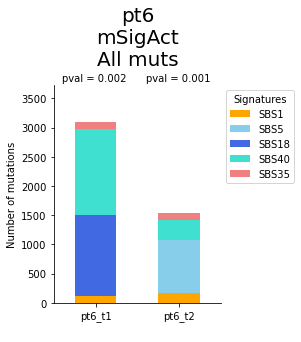

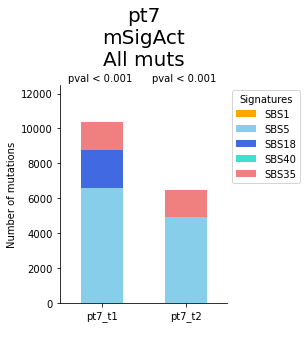

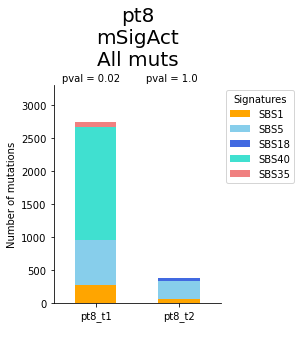

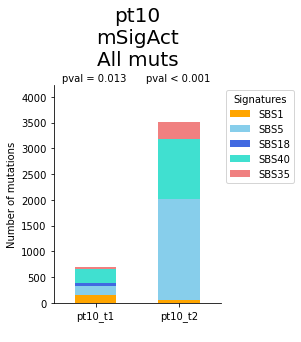

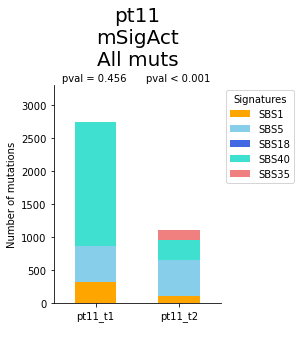

In [483]:
df = SBS35_df
sigs = df.columns.tolist()
n=0
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS35_all_pvals[n:n+2]
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nAll muts',-350,colors_list,df1.sum(axis=1).max()*1.2,True,labels,(3,4),1,1,pvals)
    n = n+2

## Prepare table for clonal mutations

In [569]:
df = pd.DataFrame()
for pt in pts:
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[pt][tumor]
        normal_id = samples_dict[pt]['normal']
        df1 = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==True)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,8139423,G,T,AQ5180_vs_AQ5174
1,chr1,19841394,C,T,AQ5180_vs_AQ5174
2,chr1,33581127,C,A,AQ5180_vs_AQ5174
3,chr1,36572090,C,A,AQ5180_vs_AQ5174
4,chr1,43256950,G,T,AQ5180_vs_AQ5174
...,...,...,...,...,...
34530,chrX,78759436,C,T,AW8057_vs_AW8060
34531,chrX,90330288,T,G,AW8057_vs_AW8060
34532,chrX,92326641,G,T,AW8057_vs_AW8060
34533,chrX,123610191,C,T,AW8057_vs_AW8060


In [25]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,10662,10662,10662,10662
C,6507,6507,6507,6507
G,6374,6374,6374,6374
T,10607,10607,10607,10607


In [571]:
df.to_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809_clonals.tsv.gz',sep='\t',index=None,compression='gzip')

## DeconstructSigs

In [26]:
all_muts_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809_clonals.tsv.gz',sep='\t')
all_muts_df = all_muts_df[['SAMPLE','CHROM']].groupby('SAMPLE',as_index=False).count()
all_muts_df = all_muts_df.rename(columns={'SAMPLE':'sample_id','CHROM':'total_muts'})
all_muts_df

,sample_id,total_muts
0,AQ5180_vs_AQ5174,984
1,AQ5181_vs_AQ5175,1258
2,AQ5182_vs_AQ5176,112
3,AQ5183_vs_AQ5177,130
4,AQ5184_vs_AQ5178,533
5,AQ5185_vs_AQ5179,2337
6,AQ5186_vs_AQ5174,1579
7,AQ5187_vs_AQ5175,1575
8,AQ5188_vs_AQ5176,96
9,AQ5189_vs_AQ5177,771


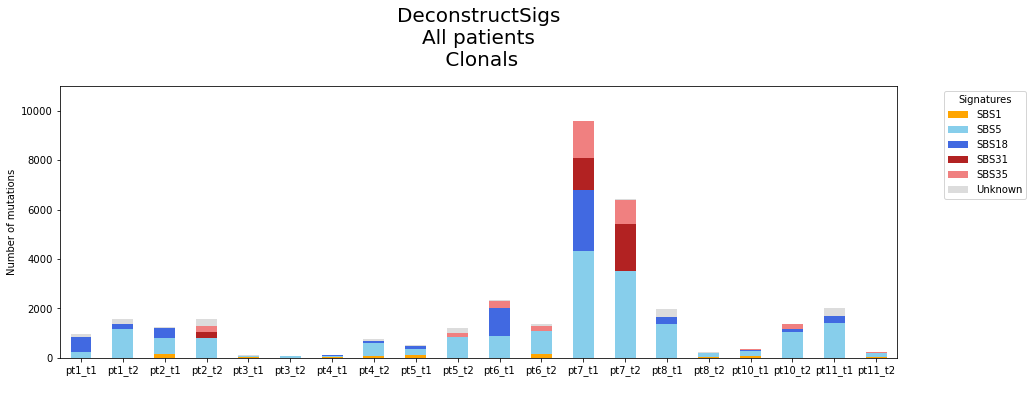

In [27]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230217_allsamples_run20220809/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = samples_dict2.keys()
labels = [samples_dict2[sample] for sample in samples_ids]
order_list = samples_dict2.keys()
plot_fitting(df,'DeconstructSigs\nAll patients\n Clonals',colors_list,labels,figsize=(15,5),ylim=11000,order_list=order_list)

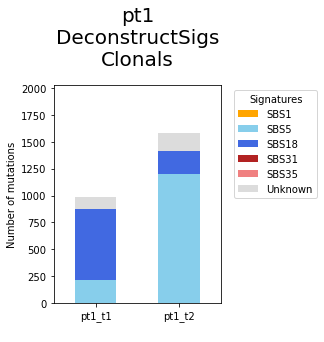

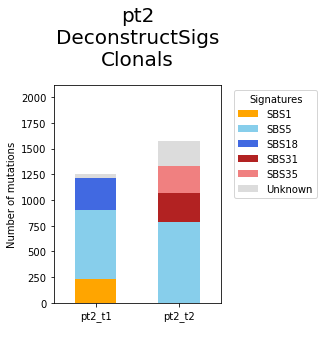

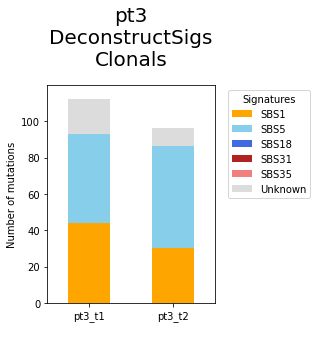

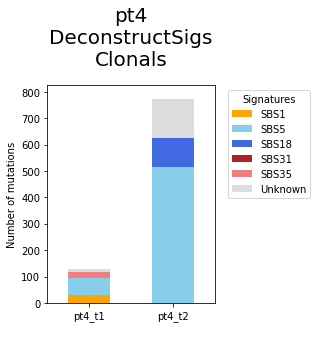

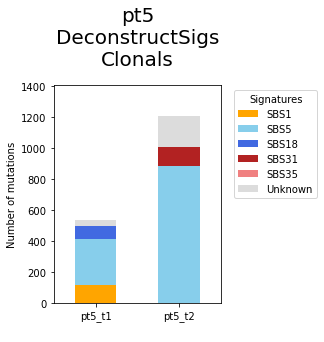

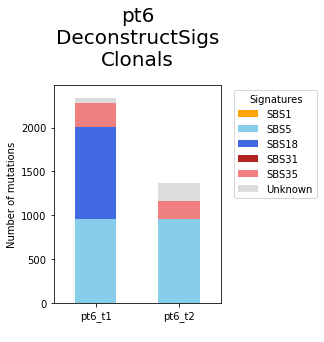

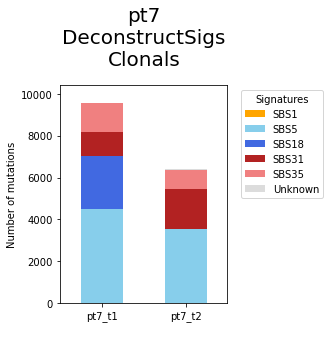

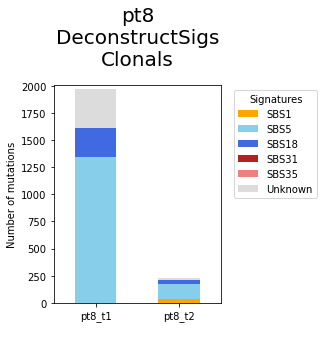

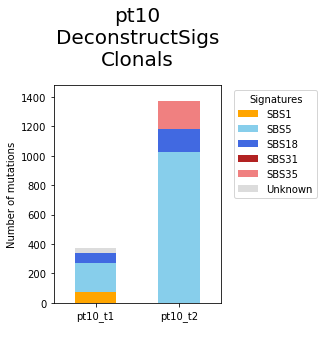

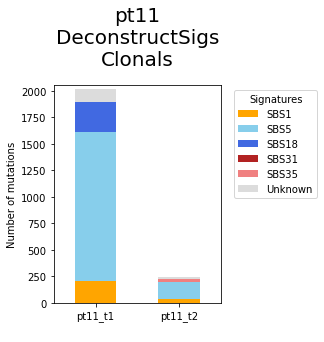

In [28]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230220_allsamples_run20220809_clonals/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]
    sigs = df1.columns.tolist()
    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    order_list = samples_dict2.keys()
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    plot_fitting(df1,pt+'\nDeconstructSigs\nClonals',colors_list,labels,figsize=(3,4),ylim=df1.max().sum(),order_list=samples_ids)

### mSigAct

In [576]:
#Prepare lists with pvalues
path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/output_sbs31/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS31.tsv'
df = pd.read_csv(path_sbs31,sep='\t')
df = df.reindex(order_list)
SBS31_all_pvals = df['pval'].tolist()
SBS31_all_pvals = [round(pval,3) for pval in SBS31_all_pvals]
path_sbs35 = path_sbs31.replace('31','35')
df = pd.read_csv(path_sbs35,sep='\t')
df = df.reindex(order_list)
SBS35_all_pvals = df['pval'].tolist()
SBS35_all_pvals = [round(pval,3) for pval in SBS35_all_pvals]

In [577]:
#prepare df with each mSigAct
df = pd.read_csv(path_sbs31,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
SBS31_df = df.reindex(order_list)
df = pd.read_csv(path_sbs35,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
SBS35_df = df.reindex(order_list)

### mSigAct SBS31

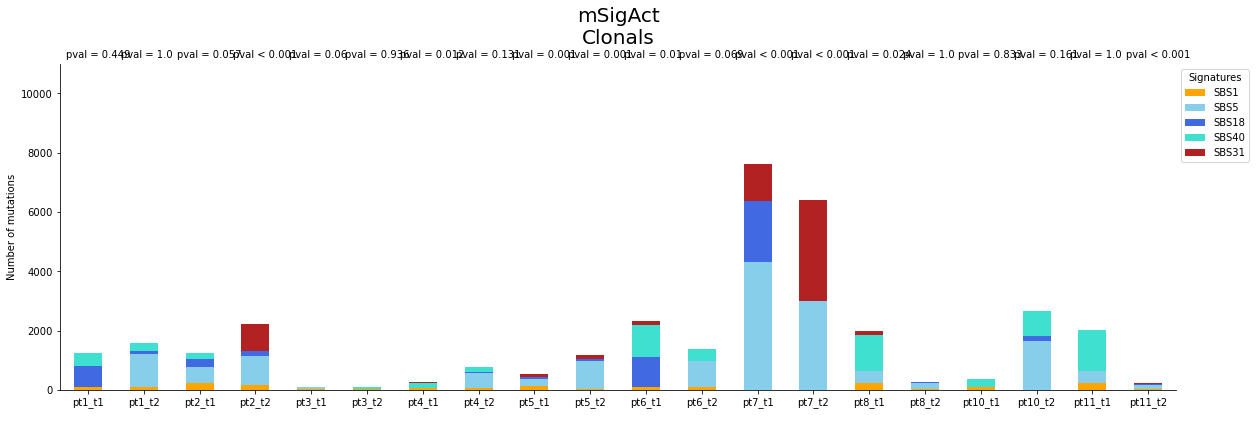

In [578]:
df = SBS31_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals
plot_fitting_per_pt(df,'mSigAct\nClonals',-350,colors_list,11000,True,labels,(20,6),1,1,pvals)

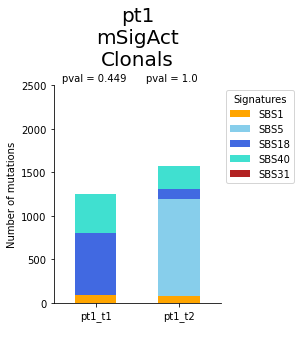

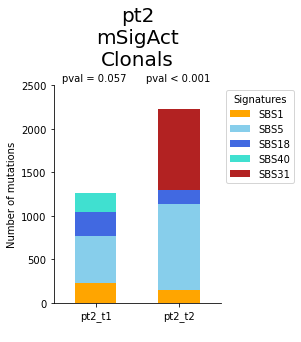

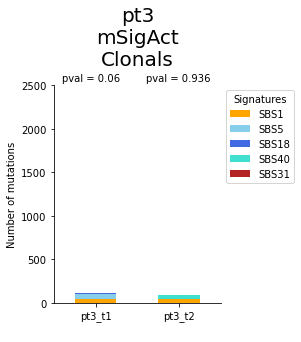

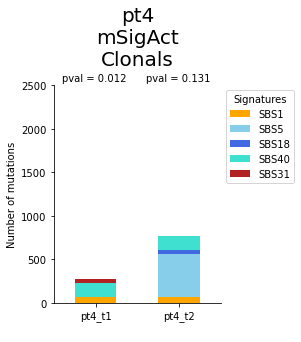

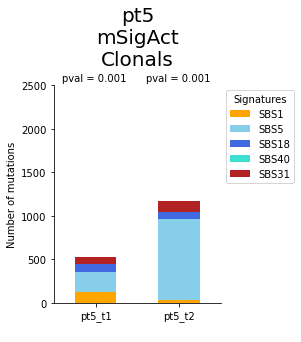

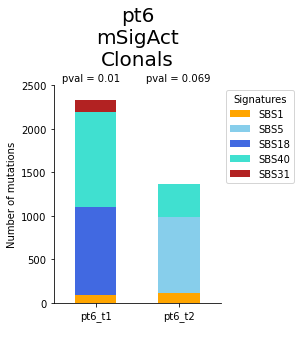

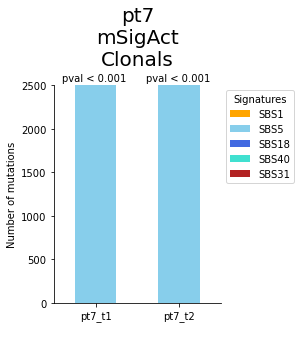

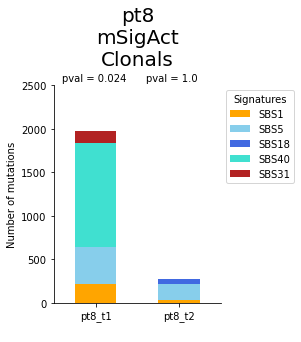

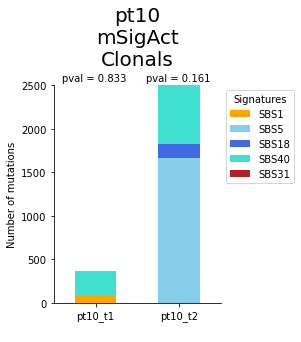

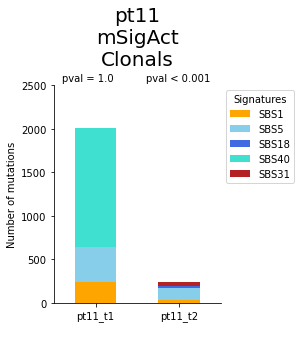

In [580]:
n=0
df = SBS31_df
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS31_all_pvals[n:n+2]
    #ylim = df1.sum(axis=1).max()*1.2
    ylim = 2500
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)
    n=n+2

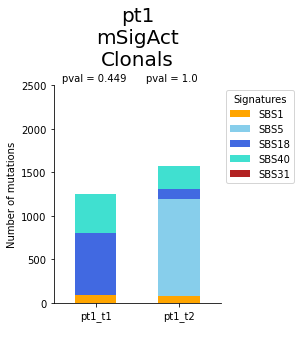

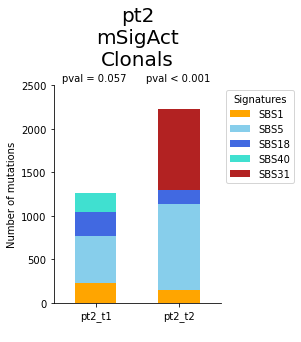

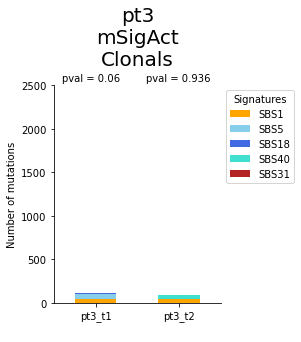

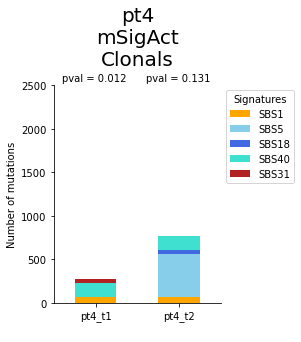

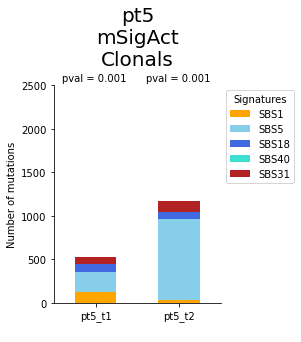

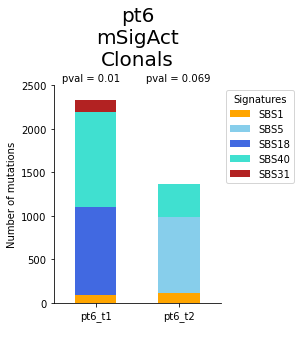

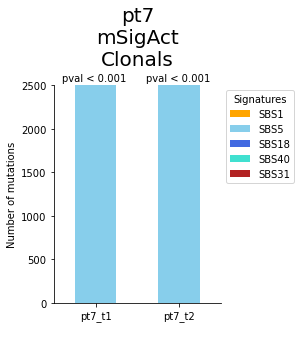

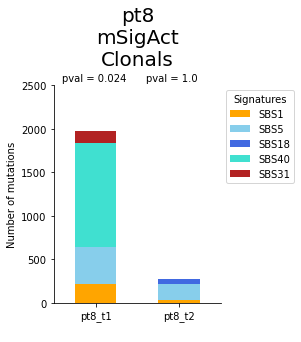

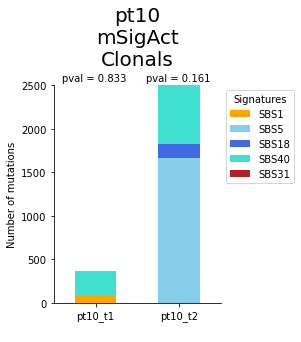

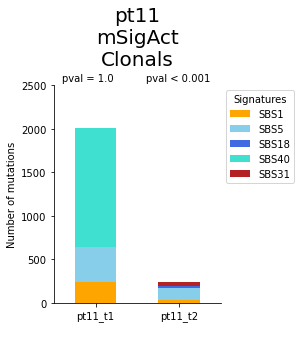

In [582]:
n=0
df = SBS31_df
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS31_all_pvals[n:n+2]
    #ylim = df1.sum(axis=1).max()*1.2
    ylim = 2500
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)
    n=n+2

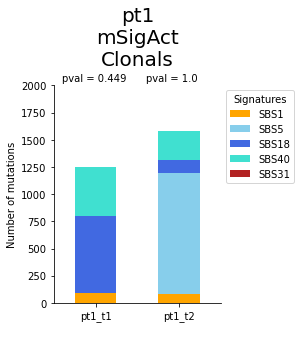

In [583]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[0:2]
#ylim = df1.sum(axis=1).max()*1.2
ylim = 2000
plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

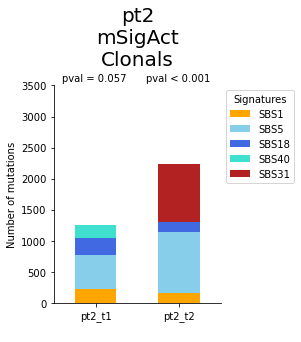

In [584]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[2:4]
#ylim = df1.sum(axis=1).max()*1.2
ylim = 3500
plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

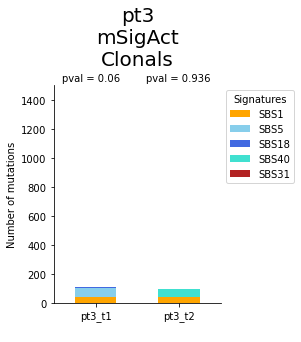

In [585]:
df = SBS31_df
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals[4:6]
#ylim = df1.sum(axis=1).max()*1.2
ylim = 1500
plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)

### mSigAct SBS35

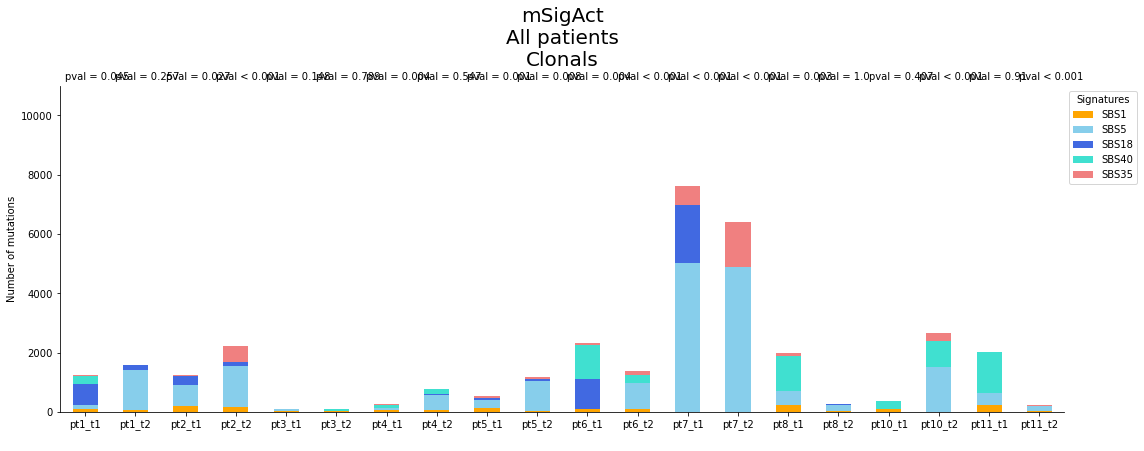

In [586]:
df = SBS35_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS35_all_pvals
plot_fitting_per_pt(df,'mSigAct\nAll patients\nClonals',-350,colors_list,11000,True,labels,(18,6),1,1,pvals)

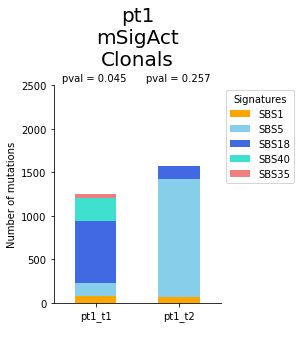

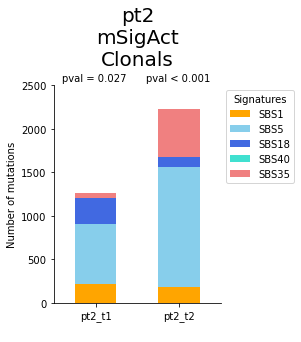

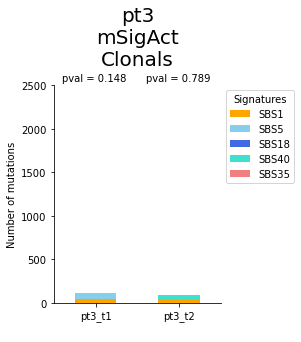

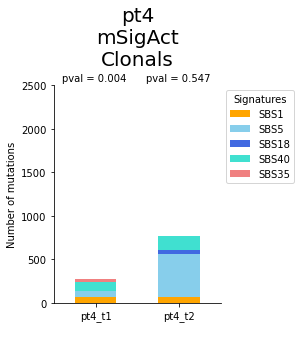

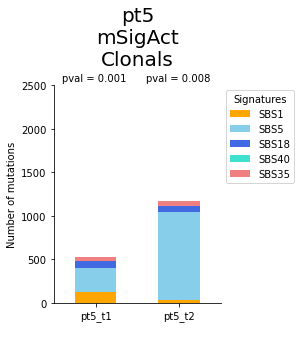

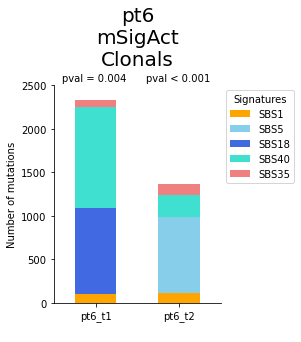

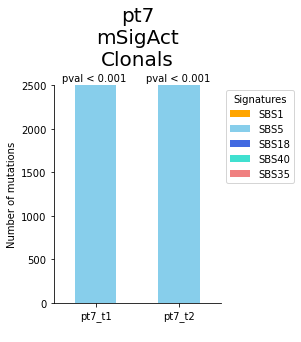

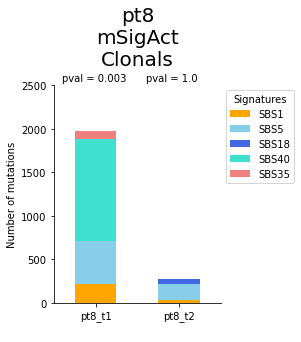

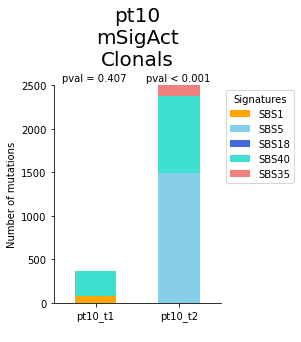

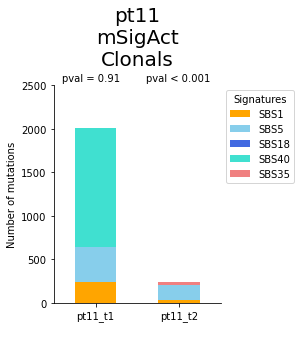

In [588]:
df = SBS35_df
sigs = df.columns.tolist()
n=0
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS35_all_pvals[n:n+2]
    #ylim = df1.sum(axis=1).max()*1.2
    ylim = 2500
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nClonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)
    n=n+2

## Prepare table for subclonal mutations

In [572]:
df = pd.DataFrame()
for pt in pts:
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[pt][tumor]
        normal_id = samples_dict[pt]['normal']
        df1 = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'+pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==False)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,22354916,C,A,AQ5180_vs_AQ5174
1,chr1,24571114,G,T,AQ5180_vs_AQ5174
2,chr1,33010722,C,A,AQ5180_vs_AQ5174
3,chr1,82072279,C,T,AQ5180_vs_AQ5174
4,chr1,98701020,C,A,AQ5180_vs_AQ5174
...,...,...,...,...,...
12874,chrX,142517955,G,C,AW8057_vs_AW8060
12875,chrX,142718466,T,C,AW8057_vs_AW8060
12876,chrX,144032771,C,T,AW8057_vs_AW8060
12877,chrX,146917099,C,G,AW8057_vs_AW8060


In [573]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,4385,4385,4385,4385
C,2106,2106,2106,2106
G,2008,2008,2008,2008
T,4380,4380,4380,4380


In [574]:
df.to_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809_subclonals.tsv.gz',sep='\t',index=None,compression='gzip')

## Deconstructsigs

In [41]:
all_muts_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/mutations_allsamples_run_20220809_subclonals.tsv.gz',sep='\t')
all_muts_df = all_muts_df[['SAMPLE','CHROM']].groupby('SAMPLE',as_index=False).count()
all_muts_df = all_muts_df.rename(columns={'SAMPLE':'sample_id','CHROM':'total_muts'})
all_muts_df

,sample_id,total_muts
0,AQ5180_vs_AQ5174,396
1,AQ5181_vs_AQ5175,1645
2,AQ5182_vs_AQ5176,66
3,AQ5183_vs_AQ5177,538
4,AQ5184_vs_AQ5178,586
5,AQ5185_vs_AQ5179,746
6,AQ5186_vs_AQ5174,122
7,AQ5187_vs_AQ5175,821
8,AQ5188_vs_AQ5176,1022
9,AQ5190_vs_AQ5178,1482


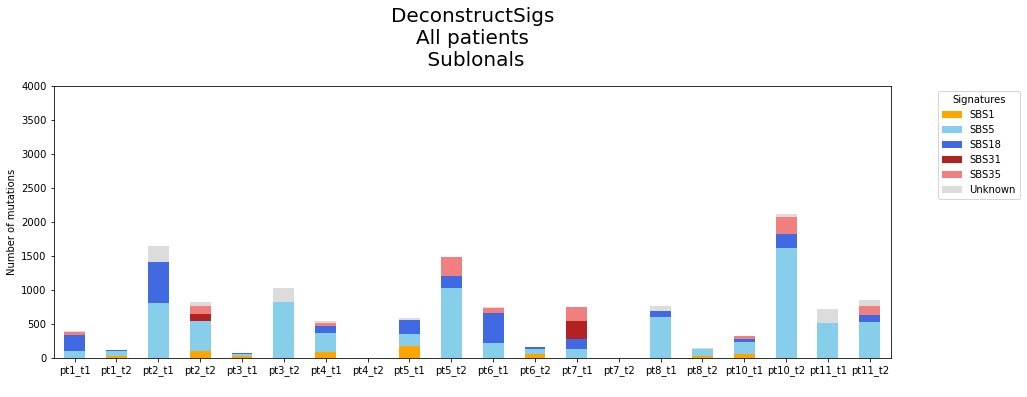

In [42]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230220_allsamples_run20220809_subclonals/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = samples_dict2.keys()
labels = [samples_dict2[sample] for sample in samples_ids]
order_list = samples_dict2.keys()
plot_fitting(df,'DeconstructSigs\nAll patients\n Sublonals',colors_list,labels,figsize=(15,5),ylim=4000,order_list=order_list)

In [45]:
df1.max().sum()

978.07

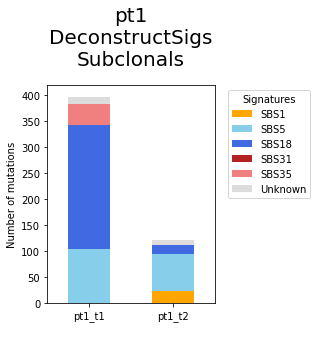

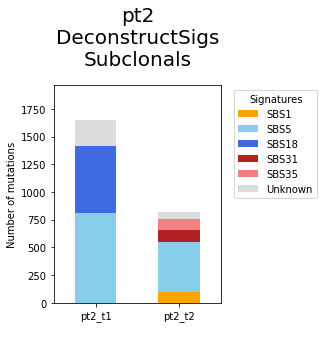

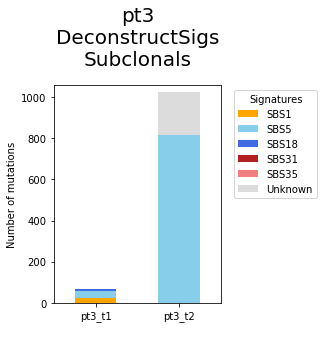

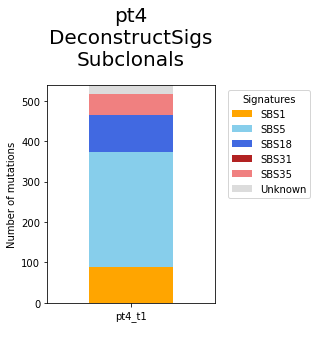

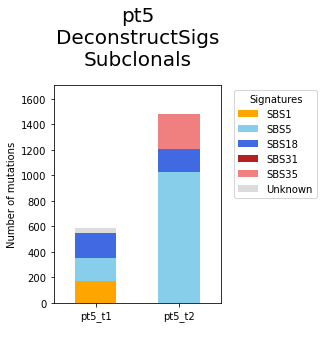

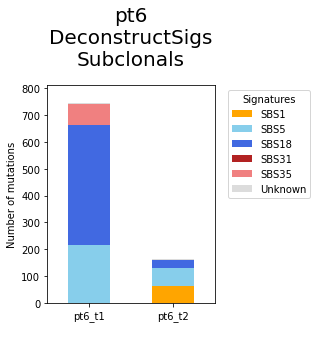

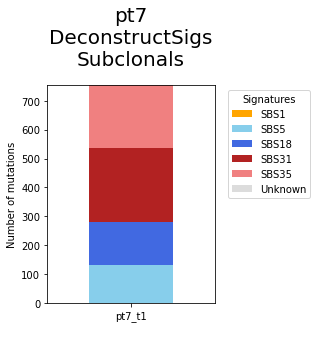

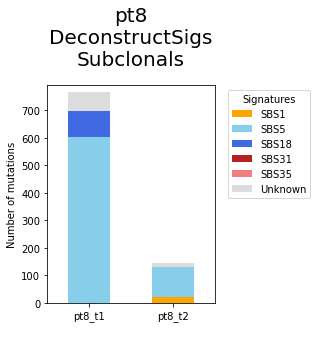

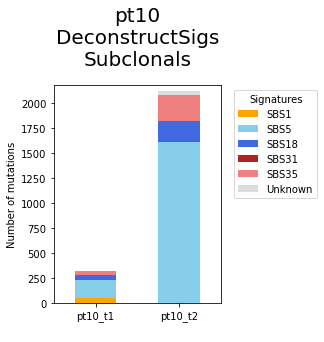

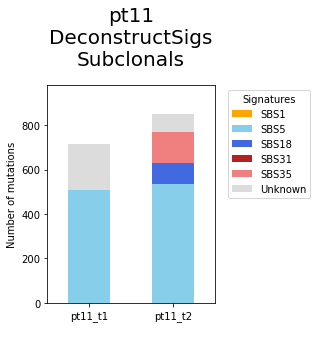

In [44]:
path = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/deconstructsigs/230220_allsamples_run20220809_subclonals/'
sigs = ['SBS1','SBS5','SBS18','SBS31','SBS35']
df = df_fitting (samples_id,all_muts_df,path,sigs)
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]
    sigs = df1.columns.tolist()
    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    order_list = samples_dict2.keys()
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    plot_fitting(df1,pt+'\nDeconstructSigs\nSubclonals',colors_list,labels,figsize=(3,4),ylim=df1.max().sum(),order_list=samples_ids)

### mSigAct

In [597]:
#Prepare lists with pvalues
path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_subclonals_SBS40/output_sbs31/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS31.tsv'
df = pd.read_csv(path_sbs31,sep='\t')
df = df.reindex(order_list)
SBS31_all_pvals = df['pval'].tolist()
SBS31_all_pvals = [round(pval,3) for pval in SBS31_all_pvals]
path_sbs35 = path_sbs31.replace('31','35')
df = pd.read_csv(path_sbs35,sep='\t')
df = df.reindex(order_list)
SBS35_all_pvals = df['pval'].tolist()
SBS35_all_pvals = [round(pval,3) for pval in SBS35_all_pvals]

In [598]:
#prepare df with each mSigAct
df = pd.read_csv(path_sbs31,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS31']]
SBS31_df = df.reindex(order_list)
df = pd.read_csv(path_sbs35,sep='\t')
df = df[['SBS1','SBS5','SBS18','SBS35']]
SBS35_df = df.reindex(order_list)

### mSigAct SBS31

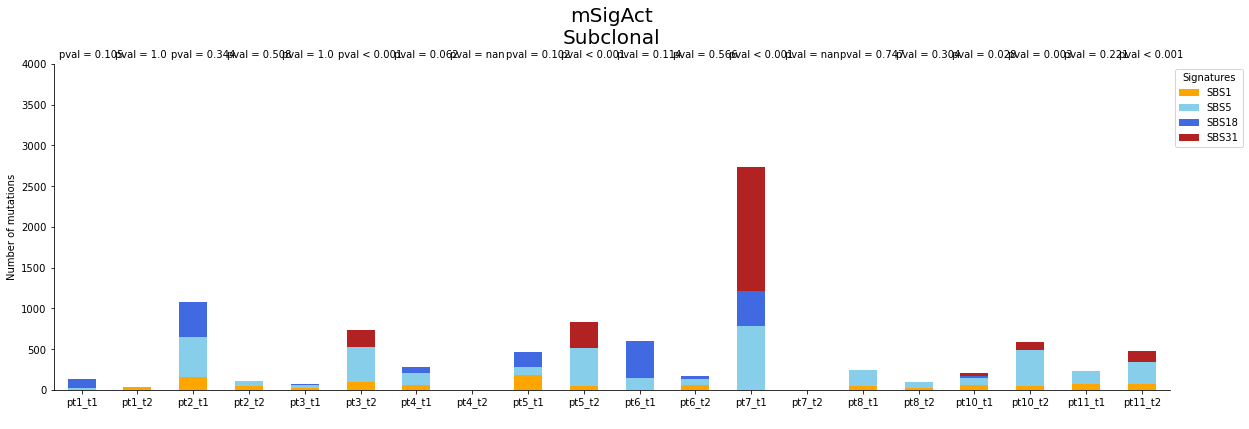

In [599]:
df = SBS31_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS31_all_pvals
plot_fitting_per_pt(df,'mSigAct\nSubclonal',-350,colors_list,4000,True,labels,(20,6),1,1,pvals)

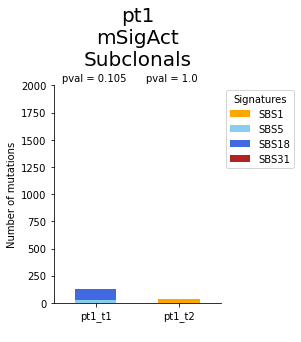

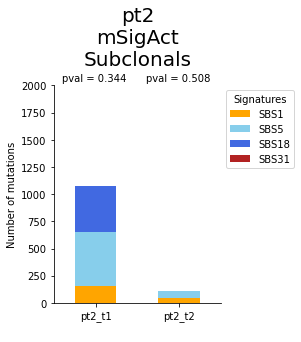

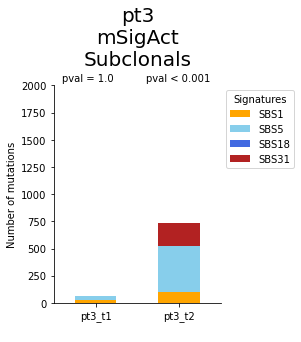

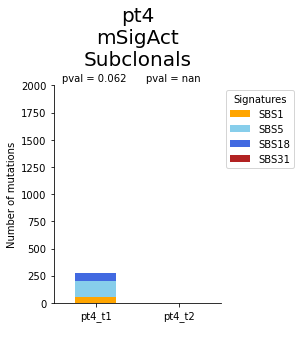

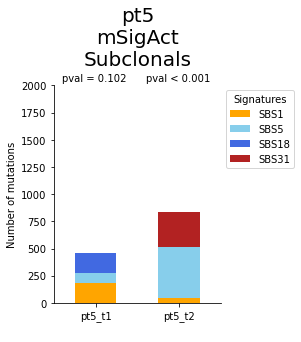

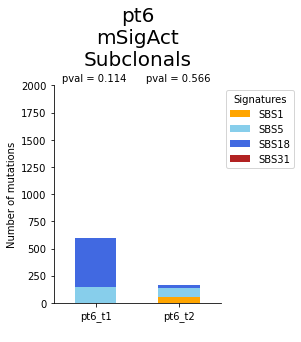

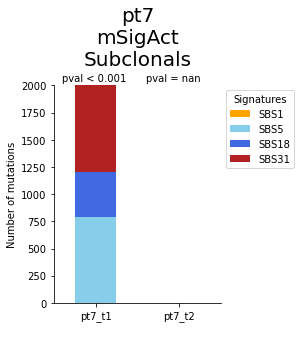

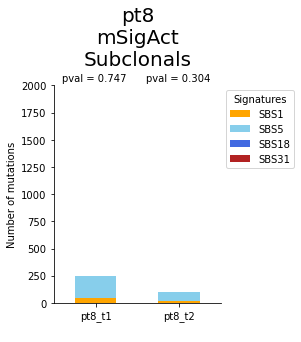

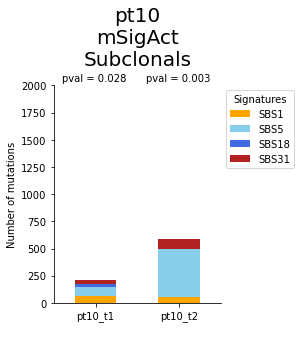

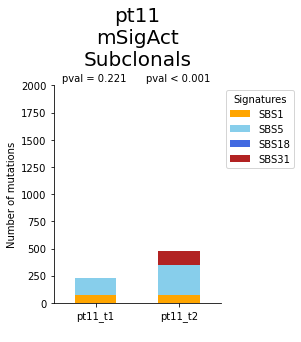

In [600]:
n=0
df = SBS31_df
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS31_all_pvals[n:n+2]
    #ylim = df1.sum(axis=1).max()*1.2
    ylim = 2000
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nSubclonals',-350,colors_list,ylim,True,labels,(3,4),1,1,pvals)
    n=n+2

### mSigAct SBS35

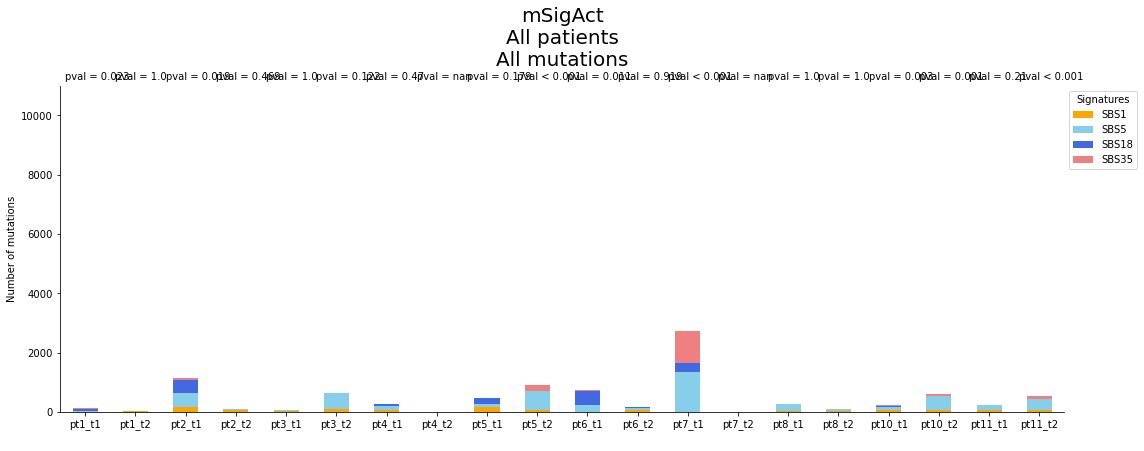

In [601]:
df = SBS35_df
sigs = df.columns.tolist()
colors_dict,colors_list = color_sigs(sigs)
samples_ids = df.index
labels = [samples_dict2[sample_id] for sample_id in samples_ids]
pvals = SBS35_all_pvals
plot_fitting_per_pt(df,'mSigAct\nAll patients\nAll mutations',-350,colors_list,11000,True,labels,(18,6),1,1,pvals)

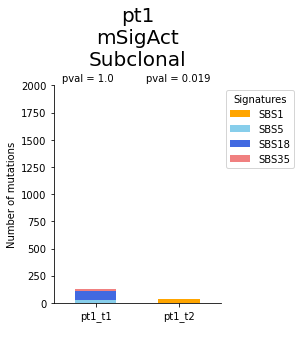

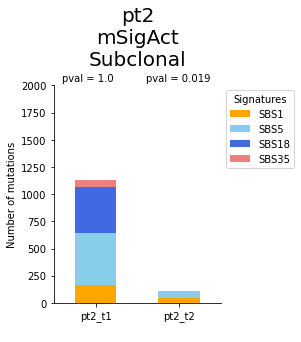

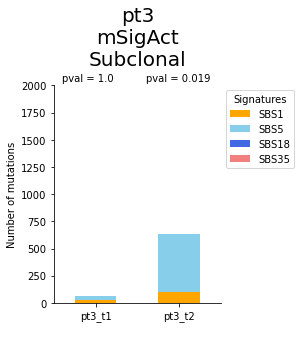

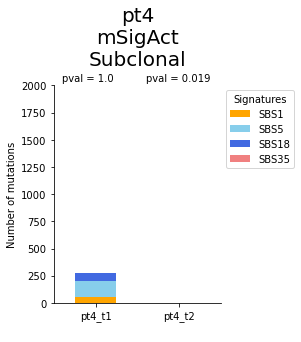

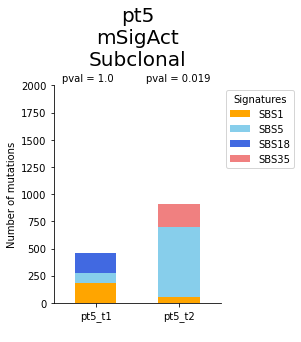

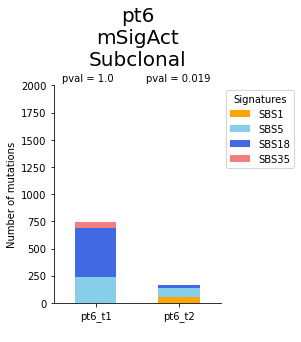

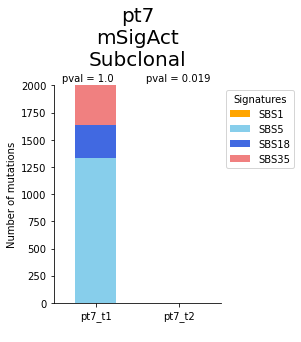

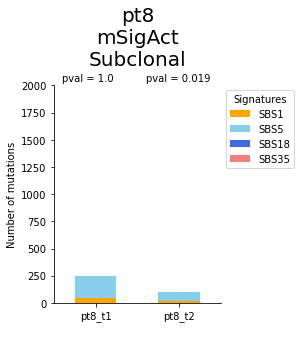

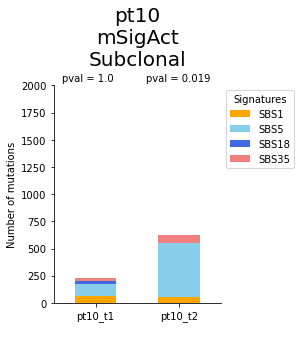

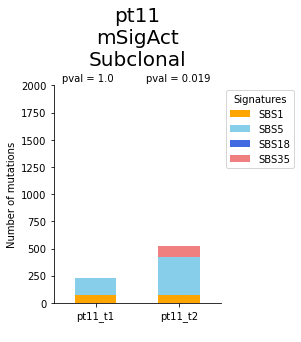

In [602]:
df = SBS35_df
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id,tumor2_id+'_vs_'+normal_id])]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = [samples_dict2[sample_id] for sample_id in samples_ids]
    pvals = SBS35_all_pvals[1:3]
    #xlim = df1.sum(axis=1).max()*1.2
    xlim = 2000
    plot_fitting_per_pt(df1,pt+'\nmSigAct\nSubclonal',-350,colors_list,xlim,True,labels,(3,4),1,1,pvals)

### Prepare plots for paper figure

In [21]:
#Prepare lists with pvalues
path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/output_sbs31/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS31.tsv'
clonals_df = pd.read_csv(path_sbs31,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df['pval'] = clonals_df['pval'].apply(lambda x: round(x,4))
clonals_pvals_dict = dict(zip(clonals_df.index,clonals_df['pval']))
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
clonals_df['clonal'] = True

path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_subclonals_SBS40/output_sbs31/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS31.tsv'
subclonals_df = pd.read_csv(path_sbs31,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df['pval'] = subclonals_df['pval'].apply(lambda x: round(x,4))
subclonals_pvals_dict = dict(zip(subclonals_df.index,subclonals_df['pval']))
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
subclonals_df['clonal'] = False

df31 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

In [22]:
#Prepare lists with pvalues
path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/output_sbs35/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS35.tsv'
clonals_df = pd.read_csv(path_sbs31,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df['pval'] = clonals_df['pval'].apply(lambda x: round(x,4))
clonals_pvals_dict = dict(zip(clonals_df.index,clonals_df['pval']))
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
clonals_df['clonal'] = True

path_sbs31 = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_subclonals_SBS40/output_sbs35/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS35.tsv'
subclonals_df = pd.read_csv(path_sbs31,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df['pval'] = subclonals_df['pval'].apply(lambda x: round(x,4))
subclonals_pvals_dict = dict(zip(subclonals_df.index,subclonals_df['pval']))
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
subclonals_df['clonal'] = False

df35 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

In [23]:
import matplotlib as mpl

In [24]:
samples_dict2

{'AQ5180_vs_AQ5174': 'pt1_t1',
 'AQ5186_vs_AQ5174': 'pt1_t2',
 'AQ5181_vs_AQ5175': 'pt2_t1',
 'AQ5187_vs_AQ5175': 'pt2_t2',
 'AQ5182_vs_AQ5176': 'pt3_t1',
 'AQ5188_vs_AQ5176': 'pt3_t2',
 'AQ5183_vs_AQ5177': 'pt4_t1',
 'AQ5189_vs_AQ5177': 'pt4_t2',
 'AQ5184_vs_AQ5178': 'pt5_t1',
 'AQ5190_vs_AQ5178': 'pt5_t2',
 'AQ5185_vs_AQ5179': 'pt6_t1',
 'AQ5191_vs_AQ5179': 'pt6_t2',
 'AW8048_vs_AW8058': 'pt7_t1',
 'AW8049_vs_AW8058': 'pt7_t2',
 'AW8050_vs_AW8061': 'pt8_t1',
 'AW8051_vs_AW8061': 'pt8_t2',
 'AW8054_vs_AW8059': 'pt10_t1',
 'AW8055_vs_AW8059': 'pt10_t2',
 'AW8056_vs_AW8060': 'pt11_t1',
 'AW8057_vs_AW8060': 'pt11_t2'}

In [25]:
samples_dict3 = {}
samples_dict3['AQ5180_vs_AQ5174'] = 'NB'
samples_dict3['AQ5186_vs_AQ5174'] = 'MRT'
samples_dict3['AQ5181_vs_AQ5175'] = 'ARMS'
samples_dict3['AQ5187_vs_AQ5175'] = 'AML'
samples_dict3['AQ5182_vs_AQ5176'] = 'EPN'
samples_dict3['AQ5188_vs_AQ5176'] = 'DMG'
samples_dict3['AQ5183_vs_AQ5177'] = 'SS'
samples_dict3['AQ5189_vs_AQ5177'] = 'AML'
samples_dict3['AQ5184_vs_AQ5178'] = 'ES'
samples_dict3['AQ5190_vs_AQ5178'] = 'AML'
samples_dict3['AQ5185_vs_AQ5179'] = 'NB'
samples_dict3['AQ5191_vs_AQ5179'] = 'AML'
samples_dict3['AW8048_vs_AW8058'] = 'NB'
samples_dict3['AW8049_vs_AW8058'] = 'AML'
samples_dict3['AW8050_vs_AW8061'] = 'BL'
samples_dict3['AW8051_vs_AW8061'] = 'THC'
samples_dict3['AW8054_vs_AW8059'] = 'MB'
samples_dict3['AW8055_vs_AW8059'] = 'MNG'
samples_dict3['AW8056_vs_AW8060'] = 'BL'
samples_dict3['AW8057_vs_AW8060'] = 'AML'

pt1_t1
NB


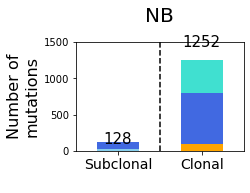

pt1_t2
MRT


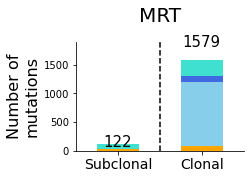

pt2_t1
ARMS


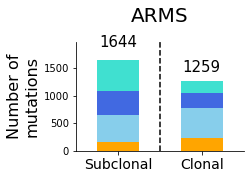

pt2_t2
AML


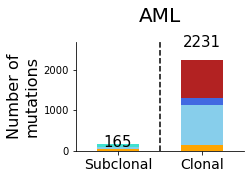

pt3_t1
EPN


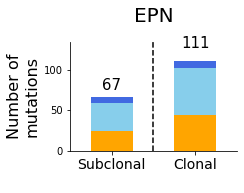

pt3_t2
DMG


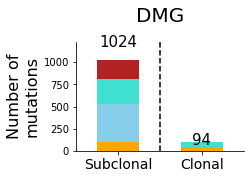

pt4_t1
SS


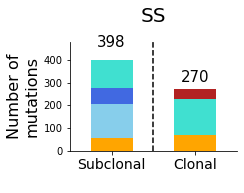

pt4_t2
AML


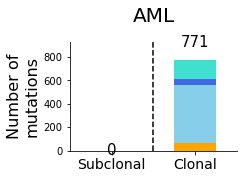

pt5_t1
ES


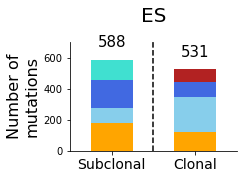

pt5_t2
AML


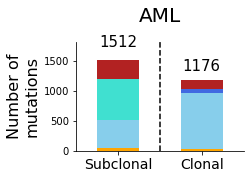

pt6_t1
NB


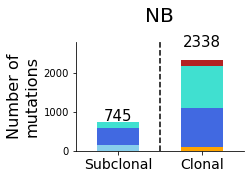

pt6_t2
AML


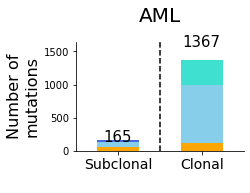

pt7_t1
NB


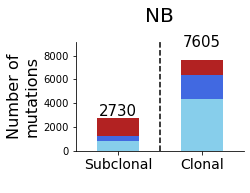

pt7_t2
AML


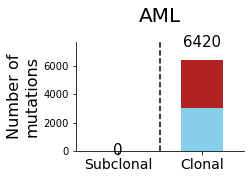

pt8_t1
BL


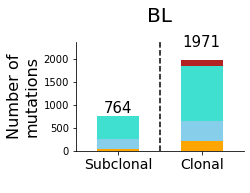

pt8_t2
THC


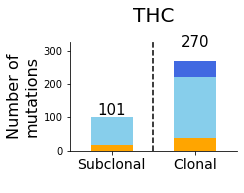

pt10_t1
MB


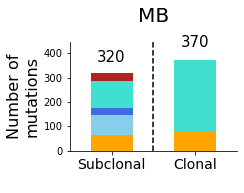

pt10_t2
MNG


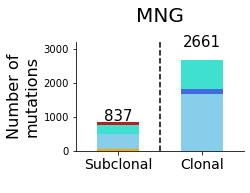

pt11_t1
BL


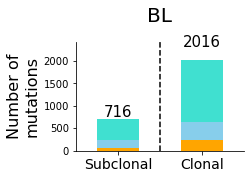

pt11_t2
AML


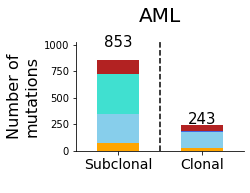

In [26]:
df = df31.copy()
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    for tumor_id in [tumor1_id,tumor2_id]:
        sample_id = samples_dict2[tumor_id+'_vs_'+normal_id]
        print(sample_id)
        print(samples_dict3[tumor_id+'_vs_'+normal_id])
        df1 = df[df.index.isin([tumor_id+'_vs_'+normal_id])]
#         display(df1.sum())

        colors_dict,colors_list = color_sigs(sigs)
        samples_ids = df1.index
        labels = ['Subclonal','Clonal']
        pval1 = subclonals_pvals_dict[samples_ids[0]]
        pval2 = clonals_pvals_dict[samples_ids[1]]
        pvals = [pval1,pval2]
        ylim = df1.sum(axis=1).max()*1.2
        figsize = (3,2)
        colors = colors_list
        legend=False
        pos1=1
        pos2=1
        title=samples_dict3[tumor_id+'_vs_'+normal_id]

        plot_fitting_per_pt(df1,title,-350,colors,ylim,legend,labels,figsize,pos1,pos2,pvals=None)

        muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
        muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

        plt.text(0,muts_subclonal*1.2,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
        plt.text(1,muts_clonal*1.2,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)


        plt.ylabel('Number of\nmutations',size=16)
        plt.xticks(size=14)

        mpl.rcParams['axes.spines.right'] = False
        mpl.rcParams['axes.spines.top'] = False

        plt.axvline(0.5,linestyle='--',c='black')

        #plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+sample_id+'_sbs31_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

        plt.show()

pt1_t1
NB


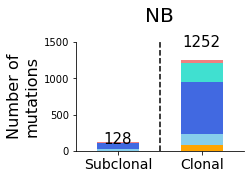

pt1_t2
MRT


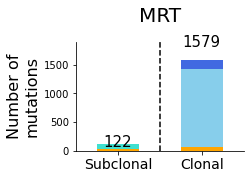

pt2_t1
ARMS


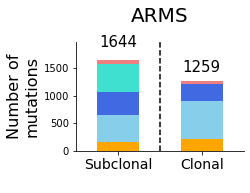

pt2_t2
AML


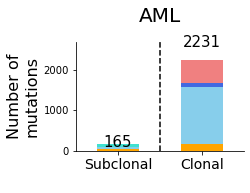

pt3_t1
EPN


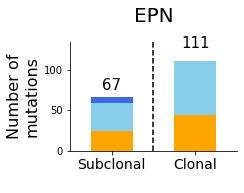

pt3_t2
DMG


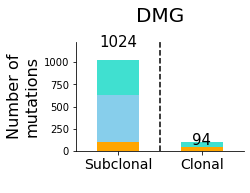

pt4_t1
SS


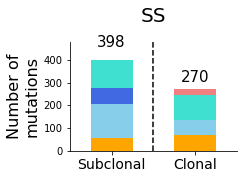

pt4_t2
AML


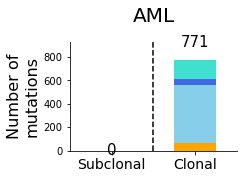

pt5_t1
ES


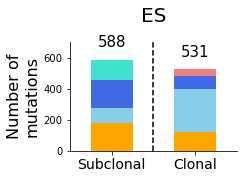

pt5_t2
AML


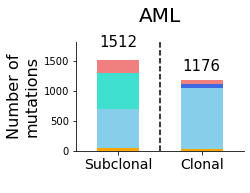

pt6_t1
NB


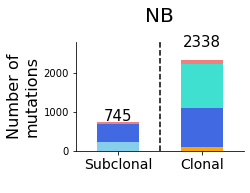

pt6_t2
AML


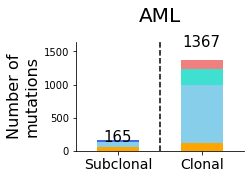

pt7_t1
NB


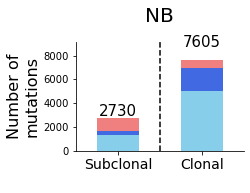

pt7_t2
AML


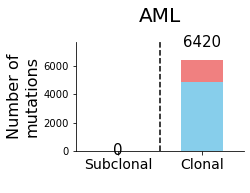

pt8_t1
BL


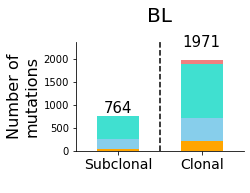

pt8_t2
THC


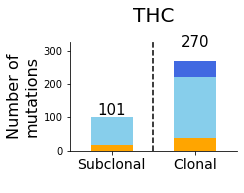

pt10_t1
MB


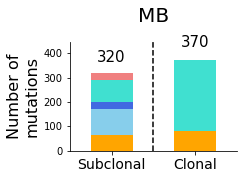

pt10_t2
MNG


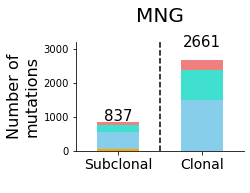

pt11_t1
BL


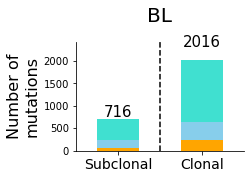

pt11_t2
AML


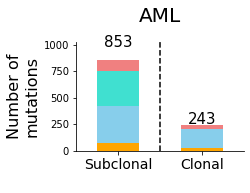

In [621]:
df = df35.copy()
sigs = df.columns.tolist()
for pt in pts:
    tumor1_id = samples_dict[pt]['tumor1']
    tumor2_id = samples_dict[pt]['tumor2']
    normal_id = samples_dict[pt]['normal']
    for tumor_id in [tumor1_id,tumor2_id]:
        sample_id = samples_dict2[tumor_id+'_vs_'+normal_id]
        print(sample_id)
        print(samples_dict3[tumor_id+'_vs_'+normal_id])
        df1 = df[df.index.isin([tumor_id+'_vs_'+normal_id])]
#         display(df1.sum())

        colors_dict,colors_list = color_sigs(sigs)
        samples_ids = df1.index
        labels = ['Subclonal','Clonal']
        pval1 = subclonals_pvals_dict[samples_ids[0]]
        pval2 = clonals_pvals_dict[samples_ids[1]]
        pvals = [pval1,pval2]
        ylim = df1.sum(axis=1).max()*1.2
        figsize = (3,2)
        colors = colors_list
        legend=False
        pos1=1
        pos2=1
        title=samples_dict3[tumor_id+'_vs_'+normal_id]

        plot_fitting_per_pt(df1,title,-350,colors,ylim,legend,labels,figsize,pos1,pos2,pvals=None)

        muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
        muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

        plt.text(0,muts_subclonal*1.2,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
        plt.text(1,muts_clonal*1.2,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)


        plt.ylabel('Number of\nmutations',size=16)
        plt.xticks(size=14)

        mpl.rcParams['axes.spines.right'] = False
        mpl.rcParams['axes.spines.top'] = False

        plt.axvline(0.5,linestyle='--',c='black')

        #plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+sample_id+'_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

        plt.show()

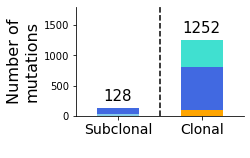

In [622]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
#ylim = df1.sum(axis=1).max()*1.2
ylim = 1800
figsize = (3,2)
colors = colors_list
legend=False
pos1=1
pos2=1
title=''

plot_fitting_per_pt(df1,title,-350,colors,ylim,legend,labels,figsize,pos1,pos2,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)


plt.ylabel('Number of\nmutations',size=16)
plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/nb_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

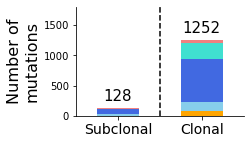

In [623]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
#ylim = df1.sum(axis=1).max()*1.2
ylim = 1800
figsize = (3,2)
colors = colors_list
legend=False
pos1=1
pos2=1
title=''

plot_fitting_per_pt(df1,title,-350,colors,ylim,legend,labels,figsize,pos1,pos2,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)


plt.ylabel('Number of\nmutations',size=16)
plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/nb_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

In [271]:
df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)

AQ5180_vs_AQ5174    396.0
AQ5180_vs_AQ5174    984.0
dtype: float64

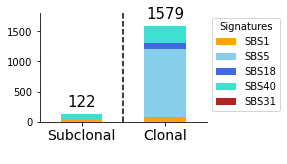

In [624]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 1800
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/mrt_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

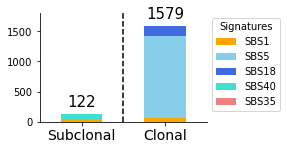

In [639]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 1800
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/mrt_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

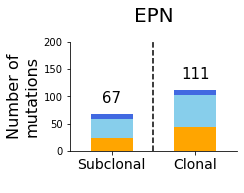

In [638]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 200
plot_fitting_per_pt(df1,'EPN',-350,colors_list,ylim,False,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+30,str(int(muts_subclonal)),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+30,str(int(muts_clonal)),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.ylabel('Number of\nmutations',size=16)
plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/epn_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

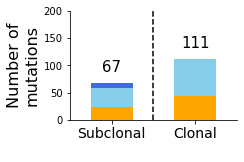

In [637]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 200
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,False,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+30,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+30,str(int(round(muts_clonal))),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.ylabel('Number of\nmutations',size=16)
plt.xticks(size=14)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/epn_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

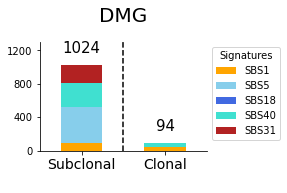

In [636]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 1300
plot_fitting_per_pt(df1,'DMG',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.xticks(size=14)
plt.yticks(np.arange(0,1400,400))
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/dmg_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

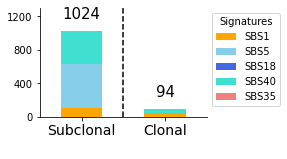

In [635]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 1300
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(muts_subclonal)),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(muts_clonal)),color='black', fontweight='normal',ha='center',va='center',size=15)

plt.xticks(size=14)
plt.yticks(np.arange(0,1400,400))
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/dmg_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

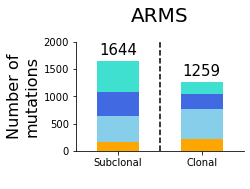

In [634]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 2000
plot_fitting_per_pt(df1,'ARMS',-350,colors_list,ylim,False,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

# plt.xticks(size=14)
# plt.yticks(np.arange(0,1400,400))
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False

plt.ylabel('Number of\nmutations',size=16)

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/arms_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

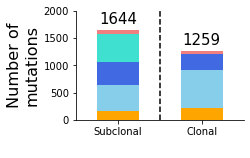

In [633]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 2000
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,False,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

# plt.xticks(size=14)
# plt.yticks(np.arange(0,1400,400))
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False

plt.ylabel('Number of\nmutations',size=16)

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/arms_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

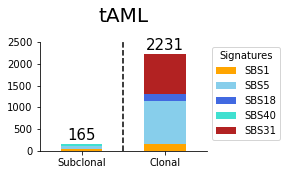

In [645]:
df = df31.copy()
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 2500
plot_fitting_per_pt(df1,'tAML',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS31']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

# plt.xticks(size=14)
# plt.yticks(np.arange(0,1400,400))
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/taml_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

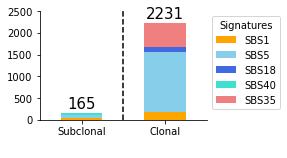

In [644]:
df = df35.copy()
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

colors_dict,colors_list = color_sigs(sigs)
samples_ids = df1.index
labels = ['Subclonal','Clonal']
pval1 = subclonals_pvals_dict[samples_ids[0]]
pval2 = clonals_pvals_dict[samples_ids[1]]
pvals = [pval1,pval2]
ylim = 2500
plot_fitting_per_pt(df1,'',-350,colors_list,ylim,True,labels,(3,2),1,1,pvals=None)

muts_subclonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[0]
muts_clonal = df1[['SBS1','SBS5','SBS18','SBS40','SBS35']].sum(axis=1)[1]

plt.text(0,muts_subclonal+200,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
plt.text(1,muts_clonal+200,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

# plt.xticks(size=14)
# plt.yticks(np.arange(0,1400,400))
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False

plt.ylabel('')

plt.axvline(0.5,linestyle='--',c='black')

plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/taml_sbs35_msigact_subclonal_clonal_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

In [28]:
df1

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AW8057_vs_AW8060,72.338514,274.986542,0.000000,3.770100e+02,128.664958,False
AW8057_vs_AW8060,29.015404,145.647941,16.449453,1.099224e-22,51.887202,True


In [27]:
def small_plot (selected_sample,figsize=(1,2),ylim=400):
    print(selected_sample)
    s = selected_sample[0]
    aging_sigs = ['SBS1','SBS5','SBS40']
    df = SBS31_df[SBS31_df.index.isin(selected_sample)]
    df['aging_sigs'] = df[aging_sigs].sum(axis=1)
    df = df[['SBS31','aging_sigs']]
    sigs = df.columns.tolist()
    labels = []
    title = ''
    xlabel=''
    ylabel='Number of\nmutations'
    loc=-80
    legend=False

    rotation_xtick=0
    rotation_pvals=0
    ha='center'

    ci_low = [ df['SBS31'][df.index==s].iloc[0] - ci_sbs31_dict[s][0] for s in selected_sample]
    ci_high = [ ci_sbs31_dict[s][1] - df['SBS31'][df.index==s].iloc[0] for s in selected_sample]

    horizontal_line_width = 0.04

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df['SBS31'].tolist()):
        if s in ['AZ6342','AZ6371']:
            ax.plot(x, 0, 'o',color='white',markersize=10)
        else:
            pos = x
            left = pos - horizontal_line_width / 2
            top = val + ci_high[x]
            right = pos + horizontal_line_width / 2
            bottom = val - ci_low[x]
            ax.plot(pos, val, 'o',color='firebrick',markersize=10)
            ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
            ax.plot([left, right], [top, top], color='k',linewidth=1.5)
            ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    ci_low = [ df['aging_sigs'][df.index==s].iloc[0] - ci_aging_dict[s][0] for s in selected_sample]
    ci_high = [ ci_aging_dict[s][1] - df['aging_sigs'][df.index==s].iloc[0] for s in selected_sample]

    for x,val in enumerate(df['aging_sigs'].tolist()):
        pos = x +0.2
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.plot(pos, val, 'o',color='cornflowerblue',markersize=10)
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    #df.plot(kind='scatter', stacked=True, figsize=figsize,color=colors_list,legend=legend,yerr = [ci_low, ci_high],capsize=6)
    plt.title(title,size=20,pad=20)
    plt.margins(0.22,0)

    #y-axis
    plt.ylabel(ylabel,size=14)
    plt.ylim(0,ylim)

    #x-axis
    plt.xlabel(xlabel)
    ticks = range(0,len(df))
    plt.xticks(ticks,[])
    plt.yticks(np.arange(0, ylim+100, 200),size=14)

    for i, v in enumerate(df['SBS31']):
        if s in ['AZ6342','AZ6371']:
            pass
        else:
            plt.text(i+0.05, v+20, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='left',va='center',size=15)
    for i, v in enumerate(df['aging_sigs']):
        plt.text(i+0.25, v-0, str(int(round(v,0))), color='cornflowerblue', fontweight='normal',ha='left',va='center',size=15)

    sbs31 = mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                              markersize=8, label='Platinum')
    aging = mlines.Line2D([], [], color='cornflowerblue', marker='o', linestyle='None',
                              markersize=8, label='Aging')
    # plt.legend(handles=[sbs31,aging],bbox_to_anchor=(1,0.05,1,1),fontsize=14,title='Mutation type',title_fontsize=15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=7)


    ax.grid(False)
    plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')
    plt.show()

In [29]:
df

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5180_vs_AQ5174,0.000000e+00,29.230568,9.876943e+01,0.000000e+00,0.000000e+00,False
AQ5186_vs_AQ5174,3.179263e+01,0.000000,0.000000e+00,9.020737e+01,0.000000e+00,False
AQ5181_vs_AQ5175,1.593222e+02,489.909243,4.288937e+02,5.658748e+02,0.000000e+00,False
AQ5187_vs_AQ5175,4.939701e+01,56.040103,0.000000e+00,5.956288e+01,0.000000e+00,False
AQ5182_vs_AQ5176,2.397885e+01,35.336415,7.684735e+00,4.534318e-27,1.059910e-28,False
AQ5188_vs_AQ5176,9.832108e+01,428.225007,0.000000e+00,2.866437e+02,2.108102e+02,False
AQ5183_vs_AQ5177,5.517848e+01,149.635014,7.187244e+01,1.213141e+02,0.000000e+00,False
AQ5189_vs_AQ5177,NaN,NaN,NaN,NaN,NaN,False
AQ5184_vs_AQ5178,1.815046e+02,94.333329,1.845946e+02,1.275675e+02,0.000000e+00,False
AQ5190_vs_AQ5178,4.536078e+01,471.859355,0.000000e+00,6.743936e+02,3.203863e+02,False


In [31]:
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

aging_sigs = ['SBS1','SBS5','SBS40']

df1['aging_sigs'] = df1[aging_sigs].sum(axis=1)
df1 = df1[['SBS31','aging_sigs','clonal']]
df1

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,SBS31,aging_sigs,clonal
AQ5180_vs_AQ5174,0.0,29.230568,False
AQ5180_vs_AQ5174,0.0,540.140789,True


In [32]:
df[['SBS1','SBS5','SBS18','SBS31','SBS40']][df.index=='AQ5186_vs_AQ5174'].sum(axis=1)

AQ5186_vs_AQ5174     122.0
AQ5186_vs_AQ5174    1579.0
dtype: float64

In [33]:
df[['SBS1','SBS5','SBS18','SBS40']][df.index=='AQ5186_vs_AQ5174'].sum(axis=1)

AQ5186_vs_AQ5174     122.0
AQ5186_vs_AQ5174    1579.0
dtype: float64

In [34]:
df[['SBS31']][df.index=='AQ5186_vs_AQ5174'].sum(axis=1)

AQ5186_vs_AQ5174    0.000000e+00
AQ5186_vs_AQ5174    1.027702e-21
dtype: float64

In [35]:
def plot_2_bars (sample_id,title,ylim,y_val):
    df1 = df[df.index.isin([sample_id])]

    other_sigs = ['SBS1','SBS5','SBS18','SBS40']

    df1['other_sigs'] = df1[other_sigs].sum(axis=1)
    df1 = df1[['SBS31','other_sigs','clonal']]

    colors_dict,colors_list = color_sigs(sigs)
    samples_ids = df1.index
    labels = ['Subclonal','Clonal']
    pval1 = subclonals_pvals_dict[samples_ids[0]]
    pval2 = clonals_pvals_dict[samples_ids[1]]
    pvals = [pval1,pval2]

    figsize = (3,2)
    # colors = colors_list
    legend=False
    pos1=1
    pos2=1

    pos1=0.05
    pos2=-0.2
    pvals=None

    #df1.plot(kind='bar', stacked=True, figsize=figsize,color=colors,legend=legend)

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df1['SBS31'].tolist()):
        pos = x-0.2
        ax.bar(pos, val,color='firebrick',width=0.2)


    for x,val in enumerate(df1['other_sigs'].tolist()):
        pos = x +0.2
        ax.bar(pos, val,color='grey',width=0.2)


    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')

    plt.xticks(range(0,len(df1)), labels, rotation=0)
    plt.title(title,size=20,pad=20)
    plt.ylabel('Number of mutations')
    plt.ylim(0,ylim)

    plt.xlabel(' ')

    if pvals != None:
        n = -0.4
        for pval in pvals:
            if pval == 0:
                text = 'pval < 0.001'
            else:
                text = 'pval = '+str(pval)

            plt.text(x=n,y=ylim*1.02,s=text)
            n = n+1

    plt.ylabel('Number of\nmutations',size=16)
    plt.xticks(size=14)

    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False

    plt.axvline(0.5,linestyle='--',c='black')
    
    for i, v in enumerate(df1['SBS31']):
        plt.text(i-0.2, v+y_val, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    for i, v in enumerate(df1['other_sigs']):
        plt.text(i+0.2, v+y_val, str(int(round(v,0))), color='grey', fontweight='normal',ha='center',va='center',size=15)



In [36]:
df[['SBS1','SBS5','SBS18','SBS31','SBS40']].sum(axis=1)

AQ5180_vs_AQ5174     128.0
AQ5186_vs_AQ5174     122.0
AQ5181_vs_AQ5175    1644.0
AQ5187_vs_AQ5175     165.0
AQ5182_vs_AQ5176      67.0
AQ5188_vs_AQ5176    1024.0
AQ5183_vs_AQ5177     398.0
AQ5189_vs_AQ5177       0.0
AQ5184_vs_AQ5178     588.0
AQ5190_vs_AQ5178    1512.0
AQ5185_vs_AQ5179     745.0
AQ5191_vs_AQ5179     165.0
AW8048_vs_AW8058    2730.0
AW8049_vs_AW8058       0.0
AW8050_vs_AW8061     764.0
AW8051_vs_AW8061     101.0
AW8054_vs_AW8059     320.0
AW8055_vs_AW8059     837.0
AW8056_vs_AW8060     716.0
AW8057_vs_AW8060     853.0
AQ5180_vs_AQ5174    1252.0
AQ5186_vs_AQ5174    1579.0
AQ5181_vs_AQ5175    1259.0
AQ5187_vs_AQ5175    2231.0
AQ5182_vs_AQ5176     111.0
AQ5188_vs_AQ5176      94.0
AQ5183_vs_AQ5177     270.0
AQ5189_vs_AQ5177     771.0
AQ5184_vs_AQ5178     531.0
AQ5190_vs_AQ5178    1176.0
AQ5185_vs_AQ5179    2338.0
AQ5191_vs_AQ5179    1367.0
AW8048_vs_AW8058    7605.0
AW8049_vs_AW8058    6420.0
AW8050_vs_AW8061    1971.0
AW8051_vs_AW8061     270.0
AW8054_vs_AW8059     370.0
A

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


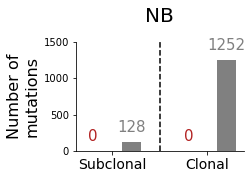

In [37]:
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 1500
title='NB'
y_val=200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/nb_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


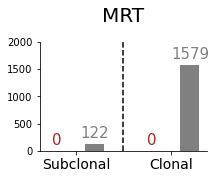

In [656]:
sigs = df.columns.tolist()
pt = 'pt1'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 2000
title='MRT'
y_val=200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/mrt_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

In [657]:
df

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5180_vs_AQ5174,0.000000e+00,29.230568,9.876943e+01,0.000000e+00,0.000000e+00,False
AQ5186_vs_AQ5174,3.179263e+01,0.000000,0.000000e+00,9.020737e+01,0.000000e+00,False
AQ5181_vs_AQ5175,1.593222e+02,489.909243,4.288937e+02,5.658748e+02,0.000000e+00,False
AQ5187_vs_AQ5175,4.939701e+01,56.040103,0.000000e+00,5.956288e+01,0.000000e+00,False
AQ5182_vs_AQ5176,2.397885e+01,35.336415,7.684735e+00,4.534318e-27,1.059910e-28,False
AQ5188_vs_AQ5176,9.832108e+01,428.225007,0.000000e+00,2.866437e+02,2.108102e+02,False
AQ5183_vs_AQ5177,5.517848e+01,149.635014,7.187244e+01,1.213141e+02,0.000000e+00,False
AQ5189_vs_AQ5177,NaN,NaN,NaN,NaN,NaN,False
AQ5184_vs_AQ5178,1.815046e+02,94.333329,1.845946e+02,1.275675e+02,0.000000e+00,False
AQ5190_vs_AQ5178,4.536078e+01,471.859355,0.000000e+00,6.743936e+02,3.203863e+02,False


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


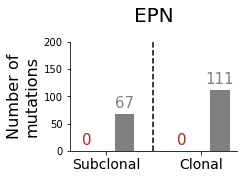

In [658]:
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 200
title='EPN'
y_val = 20
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/epn_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


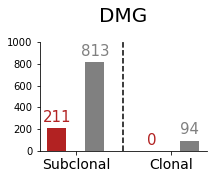

In [659]:
sigs = df.columns.tolist()
pt = 'pt3'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1000
title='DMG'
y_val = 100
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/dmg_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

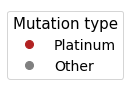

In [38]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(1,1))
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sbs31 = mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                          markersize=8, label='Platinum')
other_signatures = mlines.Line2D([], [], color='grey', marker='o', linestyle='None',
                          markersize=8, label='Other')

plt.legend(handles=[sbs31,other_signatures],bbox_to_anchor=(1,0.05,1,1),fontsize=14,title='Mutation type',title_fontsize=15)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/legend_platinum_vs_other.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


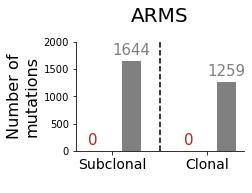

In [661]:
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 2000
title='ARMS'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/arms_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


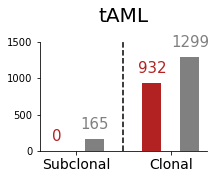

In [664]:
sigs = df.columns.tolist()
pt = 'pt2'
tumor1_id = samples_dict[pt]['tumor1']
tumor2_id = samples_dict[pt]['tumor2']
normal_id = samples_dict[pt]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1500
title='tAML'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/taml_msigact_subclonal_clonal.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Platinum vs. aging

In [39]:
import json

In [40]:
file = '/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/signatures/msigact/sigs_from_combinatorial_refitting_curated_recalculated_counts/ci_sbs31.json'
ci_sbs31_dict = json.load(open(file,'rb'))
file = '/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/signatures/msigact/sigs_from_combinatorial_refitting_curated_recalculated_counts/ci_aging.json'
ci_aging_dict = json.load(open(file,'rb'))

In [41]:
def small_barplot (SBS31_df,selected_sample,figsize=(1,2),ylim=400,x_val1=150,x_val2=150,range_val=200):
    print(selected_sample)
    s = selected_sample[0]
    aging_sigs = ['SBS1','SBS5','SBS40']
    df = SBS31_df[SBS31_df.index.isin(selected_sample)]
    df['aging_sigs'] = df[aging_sigs].sum(axis=1)
    df = df[['SBS31','aging_sigs']]
    sigs = df.columns.tolist()
    labels = []
    title = ''
    xlabel=''
    ylabel='Number of\nmutations'
    loc=-80
    legend=False

    rotation_xtick=0
    rotation_pvals=0
    ha='center'
    
    display(df)

    ci_low = [ df['SBS31'][df.index==s].iloc[0] - ci_sbs31_dict[s][0] for s in selected_sample]
    ci_high = [ ci_sbs31_dict[s][1] - df['SBS31'][df.index==s].iloc[0] for s in selected_sample]

    horizontal_line_width = 0.04

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df['SBS31'].tolist()):
#         if s in ['AZ6342','AZ6371']:
#             ax.plot(x, 0, 'o',color='white',markersize=10)
#         else:
        pos = x
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='firebrick',width=0.1,edgecolor='firebrick')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    ci_low = [ df['aging_sigs'][df.index==s].iloc[0] - ci_aging_dict[s][0] for s in selected_sample]
    ci_high = [ ci_aging_dict[s][1] - df['aging_sigs'][df.index==s].iloc[0] for s in selected_sample]

    for x,val in enumerate(df['aging_sigs'].tolist()):
        pos = x +0.2
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='cornflowerblue',width=0.1,edgecolor='cornflowerblue')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    plt.title(title,size=20,pad=20)
    plt.margins(0.22,0)

    #y-axis
    plt.ylabel(ylabel,size=14)
    plt.ylim(0,ylim)

    #x-axis
    plt.xlabel(xlabel)
    ticks = range(0,len(df))
    plt.xticks(ticks,[])
    plt.yticks(np.arange(0, ylim+100, range_val),size=14)

    for i, v in enumerate(df['SBS31']):
        plt.text(i+0.02, v+x_val1, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    
    for i, v in enumerate(df['aging_sigs']):
        plt.text(i+0.2, v+x_val2, str(int(round(v,0))), color='cornflowerblue', fontweight='normal',ha='center',va='center',size=15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=7)


    ax.grid(False)
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

In [42]:
df31

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5180_vs_AQ5174,0.000000e+00,29.230568,9.876943e+01,0.000000e+00,0.000000e+00,False
AQ5186_vs_AQ5174,3.179263e+01,0.000000,0.000000e+00,9.020737e+01,0.000000e+00,False
AQ5181_vs_AQ5175,1.593222e+02,489.909243,4.288937e+02,5.658748e+02,0.000000e+00,False
AQ5187_vs_AQ5175,4.939701e+01,56.040103,0.000000e+00,5.956288e+01,0.000000e+00,False
AQ5182_vs_AQ5176,2.397885e+01,35.336415,7.684735e+00,4.534318e-27,1.059910e-28,False
AQ5188_vs_AQ5176,9.832108e+01,428.225007,0.000000e+00,2.866437e+02,2.108102e+02,False
AQ5183_vs_AQ5177,5.517848e+01,149.635014,7.187244e+01,1.213141e+02,0.000000e+00,False
AQ5189_vs_AQ5177,NaN,NaN,NaN,NaN,NaN,False
AQ5184_vs_AQ5178,1.815046e+02,94.333329,1.845946e+02,1.275675e+02,0.000000e+00,False
AQ5190_vs_AQ5178,4.536078e+01,471.859355,0.000000e+00,6.743936e+02,3.203863e+02,False


['AQ5181_vs_AQ5175']


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SBS31,aging_sigs
AQ5181_vs_AQ5175,0.0,991.219395


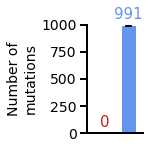

In [43]:
selected_sample = ['AQ5181_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot(df,selected_sample,figsize=(1,2),ylim=1000,x_val1=100,x_val2=100,range_val=250)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


['AQ5187_vs_AQ5175']


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SBS31,aging_sigs
AQ5187_vs_AQ5175,931.960407,1135.726213


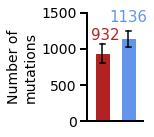

In [44]:
selected_sample = ['AQ5187_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot(df,selected_sample,figsize=(1,2),ylim=1500,x_val1=250,x_val2=300,range_val=500)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


In [45]:
dates_dict = {'pt2':{'DOB':'08-05-2000',
                     'AQ5181_vs_AQ5175':'13-12-2013',
                   'AQ5187_vs_AQ5175':'23-12-2013'}} #second neoplasm date we put the start of the treatment


def calculate_time(row,samples):
    date_dob = row['DOB']
    day_dob = date_dob.split('-')[0]
    month_dob = date_dob.split('-')[1]
    year_dob = date_dob.split('-')[2]
    for sample in samples:
        date_sample = row[sample]
        day_sample = date_sample.split('-')[0]
        month_sample = date_sample.split('-')[1]
        year_sample = date_sample.split('-')[2]
        
        years_diff = int(year_sample) - int(year_dob)
        months_diff = int(month_sample) - int(month_dob)
        days_diff = int(day_sample) - int(day_dob)
        
        all_years_diff = years_diff + (months_diff/12) + ((days_diff/30)/12)
        
        row[sample+'_t'] = all_years_diff
        
    return row

def time_table (dates_dict,pt,selected_samples,time_unit,ttmt_days):
    dates1_df = pd.DataFrame.from_dict(dates_dict[pt],orient='index')
    dates1_df = dates1_df.T


    dates1_df = dates1_df.apply(lambda row: calculate_time(row,selected_samples),axis=1)
    cols = [sample + '_t' for sample in selected_samples]

    df1 = dates1_df[cols]
    df1 = df1.rename(columns={col:col.split('_t')[0] for col in cols})
    if time_unit == 'days':        
        for sample in selected_samples:
            df1[sample] = df1[sample].apply(lambda x: x*365)
    
    df1 = df1.T
    if time_unit == 'days':
        df1['time_ttmt'] = ttmt_days
    elif time_unit == 'years':
        ttmt_years = ttmt_days/365
        df1['time_ttmt'] = ttmt_years
        
    df1 = df1.rename(columns={0:'time_birth'})

    return df1

In [46]:
df = df31[(df31.index=='AQ5187_vs_AQ5175')&(df31['clonal']==True)]
df

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5187_vs_AQ5175,153.632827,982.093386,163.31338,0.0,931.960407,True


In [47]:
selected_samples = ['AQ5181_vs_AQ5175','AQ5187_vs_AQ5175']
pt='pt2'
time_unit='days'
ttmt_days = [0,4]
time_days_dose_adj_df = time_table (dates_dict,pt,selected_samples,time_unit,ttmt_days)
time_days_dose_adj_df

,time_birth,time_ttmt
AQ5181_vs_AQ5175,4962.986111,0
AQ5187_vs_AQ5175,4973.125000,4


In [48]:
#mutations /day administered
def small_barplot_mut_rate (SBS31_df,selected_sample,figsize=(1,2),ylim=26,yticks = np.arange(-5, ylim, 5), x_val1=1, x_val2=1,log_scale=False):
    aging_sigs = ['SBS1','SBS5','SBS40']
    df = pd.merge(SBS31_df,time_days_dose_adj_df,left_index=True,right_index=True)
    df = df[df.index.isin(selected_sample)]
    df['aging_sigs'] = df[aging_sigs].sum(axis=1)
    df['SBS31_rate'] = df['SBS31'] / df['time_ttmt']
    df['aging_rate'] = df['aging_sigs'] / df['time_birth']
    sigs = df.columns.tolist()
    labels = []
    title = ''
    xlabel=''
    ylabel='Mutation rate\n(muts/day)'
    loc=-80
    legend=False
    rotation_xtick=0
    rotation_pvals=0
    ha='center'
    
    ci_low = []
    ci_high = []
    
    s = selected_sample[0]
    
    horizontal_line_width = 0.04
    fig,ax = plt.subplots(figsize=figsize)
    
    if s in ['AZ6342','AZ6371','AQ5181_vs_AQ5175']:
        pass
    else:
        cl = (df['SBS31'][df.index==s].iloc[0] - ci_sbs31_dict[s][0]) / df['time_ttmt'][df.index==s].iloc[0]
        ch = (ci_sbs31_dict[s][1] - df['SBS31'][df.index==s].iloc[0]) / df['time_ttmt'][df.index==s].iloc[0]
        ci_low.append(cl)
        ci_high.append(ch)

    for x,val in enumerate(df['SBS31_rate'].tolist()):
        if s in ['AZ6342','AZ6371','AQ5181_vs_AQ5175']:
            ax.plot(x, 0, color='white')
        else:
            pos = x
            left = pos - horizontal_line_width / 2
            top = val + ci_high[x]
            right = pos + horizontal_line_width / 2
            bottom = val - ci_low[x]
            ax.bar(pos, val, color='firebrick',width=0.1,edgecolor='firebrick')
            ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
            ax.plot([left, right], [top, top], color='k',linewidth=1.5)
            ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    ci_low = []
    ci_high = []
    for s in selected_sample:
        cl = (df['aging_sigs'][df.index==s].iloc[0] - ci_aging_dict[s][0]) / df['time_birth'][df.index==s].iloc[0]
        ch = (ci_aging_dict[s][1] - df['aging_sigs'][df.index==s].iloc[0]) / df['time_birth'][df.index==s].iloc[0]
        ci_low.append(cl)
        ci_high.append(ch)

    for x,val in enumerate(df['aging_rate'].tolist()):   
        pos = x +0.2
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='cornflowerblue',width=0.1,edgecolor='cornflowerblue')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    plt.title(title,size=20,pad=20)
    plt.margins(0.2,0)

    #y-axis
    plt.ylabel(ylabel,size=14)
    plt.ylim(0,ylim)

    #x-axis
    plt.xlabel(xlabel)
    ticks = range(0,len(df))
    plt.xticks(ticks,[])
    yticklabels = [str('') if tick == -5 else str(tick) for tick in yticks ]
    plt.yticks(ticks = yticks,labels= yticklabels,size=14)
    if log_scale==True:
        plt.yscale('log')

    for i, v in enumerate(df['SBS31_rate']):
        if selected_sample[0] in  ['AZ6342','AZ6371']:
            pass
        else:
            plt.text(i+0.1, v+x_val1, str(round(v,2)), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    for i, v in enumerate(df['aging_rate']):
        plt.text(i+0.25, v+x_val2, str(round(v,2)), color='cornflowerblue', fontweight='normal',ha='center',va='center',size=15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=7)
    
    ax.grid(False)
#    plt.savefig('/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


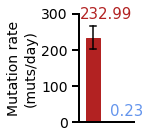

In [49]:
selected_sample = ['AQ5187_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot_mut_rate(df,selected_sample,ylim=300,yticks = np.arange(0, 310, 100),x_val1=65,x_val2=30)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


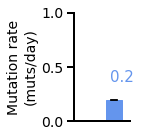

In [50]:
selected_sample = ['AQ5181_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot_mut_rate(df,selected_sample,ylim=1,yticks = np.arange(0, 1.1, 0.5),x_val1=10,x_val2=0.2)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')
